# <div style="text-align: center; font-family: Arial; font-size: 25px;color: #0047ab;"> <b>Analysis of Greater Boston Bluebike Usage for 2022-23</b>
</div>





<div style="text-align: center; font-family: Arial; font-size: 15px;color:#0047ab"> <b>Team A05: Aastha Surana, Adesina Adeniran, Nan Li, Pratik Mahajan, Shrinidhi Bhide, Soham Sarvade
    </div>


#**1. Business Problem Definition**

We plan to optimize Boston BlueBikes service for improved accessibility and efficiency. This will be done by identifying seasonal and geographic usage patterns of BlueBikes through historical data and conducting a demand analysis. Then we will check the docking stations to check how the supply fulfils the demand.


# <span style="font-family: Arial; font-size: 20px;color:#0047ab">**2. Executive Summary**

This report analyzes the Greater Boston BlueBikes system's usage patterns and infrastructure efficiency during 2022-2023. By examining ride demand, station distribution, and user behavior, it proposes actionable strategies to improve accessibility and operational performance.


**Objectives**

* Identify seasonal and geographic trends to optimize bike availability.
* Address station distribution gaps in high-demand areas.
* Differentiate member and casual rider behaviors for targeted improvements.
* Recommend system enhancements to support growth and reliability.

**Motivation**: As students commuting daily in Boston, we often struggle with BlueBikes—bikes are sometimes unavailable when needed, and docking stations are frequently full. Given Boston’s unreliable public transit, we want to analyze BlueBike usage patterns to identify inefficiencies and make biking a better commuting option for ourselves and other commuters.

**Methods**: We had two primary datasets: bluebike_trips and bluebike_stations. They contained information about trips and stations respectively. We uploaded these datasets to BigQuery, and used SQL to clean and merge them (on stationID) into one dataset which displayed the stations alongside the trip information. Then we queried the dataset to obtain insights which are given below.


**Key Findings**

1. **Seasonal Trends:** Member usage peaks in fall, casual usage in late summer, and weekday trips increased in 2023, with Thursday as the busiest day.
2. **Popular Routes:** MIT at Mass Ave / Amherst St leads as the busiest hub, with Cambridge-Boston and Brookline connections dominating.
3. **Infrastructure Gaps:** Brookline and Watertown lack sufficient stations despite high demand. Low-capacity stations support longer rides, while high-capacity stations enable frequent, shorter trips.
4. **Shifting Demand:** Central Square saw a steep decline in turnover, while Boylston St gained popularity, reflecting localized demand changes.

**Recommendations**
* **Strategic Expansion:** Add stations in high-demand but underserved areas like Brookline, Watertown, and Revere to meet growing needs.
* **Seasonal Operations:** Increase bike availability during winter and adjust station placements to support summer recreational routes.
* **Improve Weekday Services:** Prioritize reliability on key routes and busy days, such as Thursdays.
* **Enhance Casual Experience:** Promote campaigns for longer rides during off-peak seasons while maintaining member-centric incentives.


Here are the most insightful findings about BlueBikes usage patterns in the Greater Boston area:


 >**Key Hub Patterns**:
The MIT-Harvard corridor emerges as the system's backbone, with the MIT station at Mass Ave/Amherst St. consistently ranking as the most popular station throughout the year. This dominance is likely due to its strategic location at the Harvard Bridge connecting Cambridge and Boston.

> **Key User Type Patterns**:
membership subscribers count for 3/4 of the total customer base.

>**Outstanding Seasonal Trends**:
An outstanding pattern emerges in the seasonal usage with a peak in late summer and early fall, while monthly usage fluctuated more in 2022 than 2023. Winter months (January, February, December) showed growth in 2023 versus 2022.


>**Infrastructure-Usage Mismatch**:
An important infrastructure gap exists in certain municipalities:
While Boston (264 stations) and Cambridge (89 stations) have extensive coverage, some high-demand areas are underserved
Notably, Brookline and Watertown show high ridership despite having only 14 and 6 stations respectively, indicating potential need for expansion.


>**Inter-Municipal Connections**:
The system shows strong inter-municipal connectivity patterns, particularly between:
Cambridge-Boston
Somerville-Cambridge
Brookline-Boston
These connections highlight the bike-share system's role in facilitating cross-city commuting.


This analysis suggests that while BlueBikes effectively serves major academic and commercial hubs, there's room for strategic expansion in high-demand areas with currently limited infrastructure.


# <span style="font-family: Arial; font-size: 20px;color:#0047ab"> **Entity Relationship Diagram**

ERD
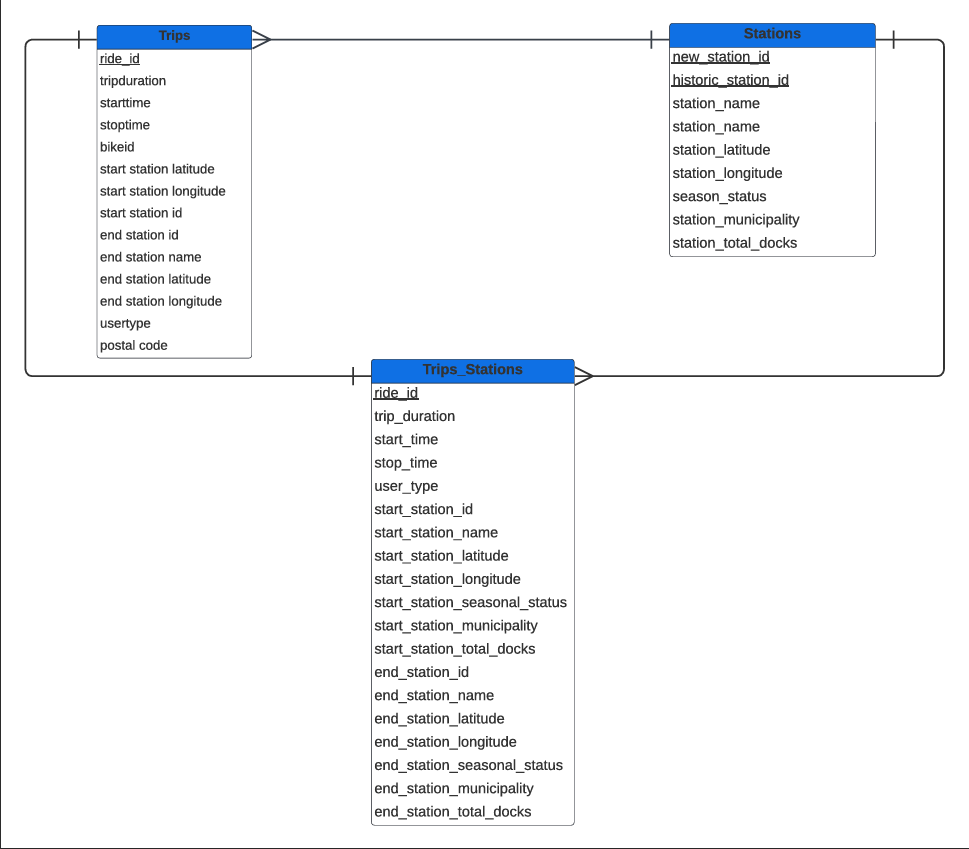

#<span style="font-family: Arial; font-size: 20px;color:#0047ab">**3. Data Sources and Data Dictionary**

Data Source:
    
• Bluebike trip datasets: [https://s3.amazonaws.com/hubway-data/index.html](https://s3.amazonaws.com/hubway-data/index.html)

• Bluebike station datasets: [https://bluebikes.com/system-data](https://bluebikes.com/system-data)


In the dataset, we have 24 monthly bluebike trip tables and one table containing detailed bluebike station information. In our analysis, we generate a stacked table with 24 month trip data.




| Field name                 | Type      |      Description             |
|:--------------------------:|:---------:|:---------------------------------------------------------------------------:|
| trip_duration              | INTEGER   |    <center>trip duration in seconds</center>         |
| start_time                 | TIMESTAMP |  start time of the bike trip, including year,month, date and datetime                                                |
| stop_time                  | TIMESTAMP |  end time of the bike trip,tart time of the bike trip, including year,month, date and datetime   
| user_type                  | STRING    |    members or casual customers  |
| start_station_ID           | STRING    |      -    |
| end_station_ID             | STRING    |      -     |
| start_station_name         | STRING    |       -   |
| start_station_lat          | FLOAT     |     the lattitude of the start station      |
| start_station_long         | FLOAT     |      the longitude of the start station      |
| start_seasonal_status      | STRING    |       year bound-stations available for the whole year; winter storage-stations not available from December to February   |
| start_station_municipality | STRING    |       -    |
| start_station_total_docks  | INTEGER   |        -  |
| end_station_name           | STRING    |        -  |
| end_station_lat            | FLOAT     |       the lattitude of the end station    |
| end_station_long           | FLOAT     |        the longitude of the end station     |
| end_seasonal_status        | STRING    |  year bound-stations available for the whole year; winter storage-stations not available from December to February        |
| end_station_municipality   | STRING    |         - |
| end_station_total_docks    | INTEGER   |         -  |


The table of station information contains following columns:

| Field name             | Type    | Description |
|:-----------------------:|:---------:|:-------------:|
| new_station_id         | STRING  | the new station ID after 2023, March          |
| station_name           | STRING  | -           |
| station_lat            | FLOAT   | -           |
| station_long           | FLOAT   | -           |
| seasonal_status        | STRING  |  year bound-stations available for the whole year; winter storage-stations not available from December to February         |
| station_municipality   | STRING  | the municipality where the station is located          |
| station_total_docks    | INTEGER |the total docks in the station         |
| historic_station_id    | STRING  | station ID before 2023, April          |



#<span style="font-family: Arial; font-size: 20px;color:#0047ab">**4.Data Cleaning & Table Merging**


<span style="font-family: Arial; font-size: 15px;">
First of all, we would like to make the columns of the 24 monthly trip tables into standard format before concatenating them into one table. As the monthly tables 2022_01 - 2023_03 have different schemas from the tables 2023_04 -2023_12, we need to standardize the schema across 24 tables.

For tables from 2023_04 to 2023_12:

In [ ]:
%%bigquery  --project ba775-project-a05

CREATE OR REPLACE TABLE  ba775-project-a05.bluebike_trips.2023_04_to_12 AS

SELECT
  started_at AS start_time,
  ended_at AS stop_time,
  start_station_name,
  start_station_id,
  end_station_name,
  end_station_id,
  start_lat,
  start_lng AS start_long,
  end_lat,
  end_lng AS end_long,
  member_casual AS user_type
FROM `ba775-project-a05.bluebike_trips.2023_04`

UNION ALL

SELECT
  started_at AS start_time,
  ended_at AS stop_time,
  start_station_name,
  start_station_id,
  end_station_name,
  end_station_id,
  start_lat,
  start_lng AS start_long,
  end_lat,
  end_lng AS end_long,
  member_casual AS user_type
FROM `ba775-project-a05.bluebike_trips.2023_05`

UNION ALL

SELECT
  started_at AS start_time,
  ended_at AS stop_time,
  start_station_name,
  start_station_id,
  end_station_name,
  end_station_id,
  start_lat,
  start_lng AS start_long,
  end_lat,
  end_lng AS end_long,
  member_casual AS user_type
FROM `ba775-project-a05.bluebike_trips.2023_06`

UNION ALL

SELECT
  started_at AS start_time,
  ended_at AS stop_time,
  start_station_name,
  start_station_id,
  end_station_name,
  end_station_id,
  start_lat,
  start_lng AS start_long,
  end_lat,
  end_lng AS end_long,
  member_casual AS user_type
FROM `ba775-project-a05.bluebike_trips.2023_07`

UNION ALL

SELECT
  started_at AS start_time,
  ended_at AS stop_time,
  start_station_name,
  start_station_id,
  end_station_name,
  end_station_id,
  start_lat,
  start_lng AS start_long,
  end_lat,
  end_lng AS end_long,
  member_casual AS user_type
FROM `ba775-project-a05.bluebike_trips.2023_08`

UNION ALL

SELECT
  started_at AS start_time,
  ended_at AS stop_time,
  start_station_name,
  start_station_id,
  end_station_name,
  end_station_id,
  start_lat,
  start_lng AS start_long,
  end_lat,
  end_lng AS end_long,
  member_casual AS user_type
FROM `ba775-project-a05.bluebike_trips.2023_09`

UNION ALL

SELECT
  started_at AS start_time,
  ended_at AS stop_time,
  start_station_name,
  start_station_id,
  end_station_name,
  end_station_id,
  start_lat,
  start_lng AS start_long,
  end_lat,
  end_lng AS end_long,
  member_casual AS user_type
FROM `ba775-project-a05.bluebike_trips.2023_10`

UNION ALL

SELECT
  started_at AS start_time,
  ended_at AS stop_time,
  start_station_name,
  start_station_id,
  end_station_name,
  end_station_id,
  start_lat,
  start_lng AS start_long,
  end_lat,
  end_lng AS end_long,
  member_casual AS user_type
FROM `ba775-project-a05.bluebike_trips.2023_11`

UNION ALL

SELECT
  started_at AS start_time,
  ended_at AS stop_time,
  start_station_name,
  start_station_id,
  end_station_name,
  end_station_id,
  start_lat,
  start_lng AS start_long,
  end_lat,
  end_lng AS end_long,
  member_casual AS user_type
FROM `ba775-project-a05.bluebike_trips.2023_12`;


Query is running:   0%|          |

""


In [ ]:
%%bigquery
-- add new columns to the table 2023_04_to_12: trip_duration,buke_id, post_code

ALTER TABLE `ba775-project-a05.bluebike_trips.2023_04_to_12`
ADD COLUMN trip_duration INTEGER,
ADD COLUMN bike_id INTEGER,
ADD COLUMN post_code STRING;


Query is running:   0%|          |

""


In [ ]:
%%bigquery
-- calculate the trip_duration of table 2023_04_to_12

UPDATE `ba775-project-a05.bluebike_trips.2023_04_to_12`
SET trip_duration = TIMESTAMP_DIFF(stop_time, start_time, SECOND)
WHERE trip_duration IS NULL;

Query is running:   0%|          |

""


In [ ]:
%%bigquery

--reset the order of columns in the table bluebike_trips.2023_04_12 and create a new table named bluebike_trips.new_202304_to_12

CREATE OR REPLACE TABLE ba775-project-a05.bluebike_trips.new_202304_to_12 AS
SELECT trip_duration,start_time,stop_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_long,end_lat,end_long,user_type,bike_id,post_code
FROM `ba775-project-a05.bluebike_trips.2023_04_to_12`

Query is running:   0%|          |

""


For tables 2022_01 to 2023_03:

In [ ]:
%%bigquery

--concatenate the tables of 2022_01 to 2023_03, including the revelant columns and changing the column names

CREATE OR REPLACE TABLE ba775-project-a05.bluebike_trips.202201_to_202303 AS
SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_01`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_02`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_03`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_04`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_05`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_06`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_07`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_08`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_09`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_10`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_11`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_12`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2023_01`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2023_02`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2023_03`


Query is running:   0%|          |

""


In [ ]:
%%bigquery

-- Convert station id columns to string values and replace the table

CREATE OR REPLACE TABLE `ba775-project-a05.bluebike_trips.202201_to_202303` AS

SELECT
  trip_duration,
  start_time,
  stop_time,
  start_station_name,
  CAST(start_station_id AS STRING) AS start_station_id,
  end_station_name,
  CAST(end_station_id AS STRING) AS end_station_id,
  start_lat,
  start_long,
  end_lat,
  end_long,
  user_type,
  bike_id,
  post_code
FROM
  `ba775-project-a05.bluebike_trips.202201_to_202303`;


Query is running:   0%|          |

""


In [ ]:
%%bigquery

UPDATE `ba775-project-a05.bluebike_trips.202201_to_202303`
SET user_type = CASE
WHEN user_type = 'Subscriber' THEN 'member'
WHEN user_type = 'Customer' THEN 'casual'
 END
WHERE user_type IN ('Customer','Subscriber');


Query is running:   0%|          |

""


Use UNION to concatenate the two tables to get all trip data in one table:

In [ ]:
%%bigquery

-- concatenate the two tables: 202201_to_202303 and 2023_04_to_12 to

CREATE OR REPLACE TABLE ba775-project-a05.bluebike_trips.bluebike_trips_2022_2023 AS
SELECT *
FROM `ba775-project-a05.bluebike_trips.202201_to_202303`

UNION ALL

SELECT *
FROM `ba775-project-a05.bluebike_trips.new_202304_to_12`




Query is running:   0%|          |

""


<span style="font-family: Arial; font-size: 15px;">
We drop the null values from some columns mentioned above,drop bike_id and post_code columns, and make a new table.

In [ ]:
%%bigquery
-- Replace the existing table with new data using the query
CREATE OR REPLACE TABLE `ba775-project-a05.bluebike_trips.bluebike_trips_2022_2023` AS

SELECT
  -- Select all columns except bike_id and post_code
 trip_duration,
 start_time,
 stop_time,
 start_station_name,
 start_station_id,
 end_station_name,
 end_station_id,
 start_lat,
 start_long,
 end_lat,
 end_long,
 user_type
FROM `ba775-project-a05.bluebike_trips.bluebike_trips_2022_2023`

WHERE
  start_station_name IS NOT NULL
  AND start_station_id IS NOT NULL
  AND end_station_name IS NOT NULL
  AND end_station_id IS NOT NULL
  AND end_lat IS NOT NULL
  AND end_long IS NOT NULL;


Query is running:   0%|          |

""


<span style="font-family: Arial; font-size: 15px;">Now, we go foward checking the station table

In [ ]:
%%bigquery

-- rename the columns of station table

CREATE OR REPLACE TABLE `ba775-project-a05.bluebike_station_info.bluebike_station` AS
SELECT
    NULLIF(Number, 'TBD - upcoming install') AS new_station_id,
    NAME AS station_name,
    Lat AS station_lat,
    Long AS station_long,
    `Seasonal Status` AS seasonal_status,
    Municipality AS station_municipality,
    `Total Docks` AS station_total_docks,
    CAST(`Station ID _to match to historic system data_` AS STRING) AS historic_station_id
FROM
    `ba775-project-a05.bluebike_station_info.bluebike_station`;


Executing query with job ID: 473514cf-c3a2-4218-a507-41e48db416fd
Query executing: 0.36s


ERROR:
 400 Unrecognized name: Number at [5:12]; reason: invalidQuery, location: query, message: Unrecognized name: Number at [5:12]

Location: US
Job ID: 473514cf-c3a2-4218-a507-41e48db416fd



<span style="font-family: Arial; font-size: 15px;"> Then we check the null values in each column.

<span style="font-family: Arial; font-size: 15px;"> As we can see from the output above, only 6 stations have both missing new IDs.The missing historic IDs will not be a problem since the new IDs are recorded. We plan to drop these rows.

In [ ]:
%%bigquery

-- Create or replace the table, filtering out rows where both new_station_id and historic_station_id are NULL
CREATE OR REPLACE TABLE `ba775-project-a05.bluebike_station_info.bluebike_station` AS

SELECT *
FROM `ba775-project-a05.bluebike_station_info.bluebike_station`
WHERE NOT (new_station_id IS NULL );



Query is running:   0%|          |

""


<span style="font-family: Arial; font-size: 15px;">Merging trip table and station table based on station IDs

In [ ]:
%%bigquery

-- Due to the station ID system has been modified since April, 2023, a mapping table is created to map the historic and new id code system.
CREATE OR REPLACE TABLE `ba775-project-a05.bluebike_trips.final_bluebike_trips` AS

WITH station_mapping AS (
  SELECT
    COALESCE(CAST(new_station_id AS STRING), CAST(historic_station_id AS STRING)) AS unified_station_id,
    CAST(new_station_id AS STRING) AS new_station_id,
    CAST(historic_station_id AS STRING) AS historic_station_id
  FROM `ba775-project-a05.bluebike_station_info.bluebike_station`
),

-- Define a CTE to normalize the start and end station IDs
trips_normalized AS (
  SELECT
    t.*,
    -- Normalize the start station ID using station mapping
    COALESCE(sm.unified_station_id, CAST(t.start_station_id AS STRING)) AS normalized_start_station_id,
    -- Normalize the end station ID using station mapping
    COALESCE(em.unified_station_id, CAST(t.end_station_id AS STRING)) AS normalized_end_station_id
  FROM `ba775-project-a05.bluebike_trips.bluebike_trips_2022_2023` t



  -- Join with station_mapping to normalize start station
  LEFT JOIN station_mapping sm
    ON CAST(t.start_station_id AS STRING) = sm.new_station_id
    OR CAST(t.start_station_id AS STRING) = sm.historic_station_id

  -- Join with station_mapping to normalize end station
  LEFT JOIN station_mapping em
    ON CAST(t.end_station_id AS STRING) = em.new_station_id
    OR CAST(t.end_station_id AS STRING) = em.historic_station_id
)


-- Select from trips_normalized and enrich with station details
SELECT
  -- Explicitly select columns from trips_normalized to avoid duplicates
  tn.trip_duration,
  tn.start_time,
  tn.stop_time,
  tn.user_type,
  tn.normalized_start_station_id AS start_station_ID,
  tn.normalized_end_station_id AS end_station_ID,

  -- Enrich start station details
  bs_start.station_name AS start_station_name,
  bs_start.station_lat AS start_station_lat,
  bs_start.station_long AS start_station_long,
  bs_start.seasonal_status AS start_seasonal_status,
  bs_start.station_municipality AS start_station_municipality,
  bs_start.station_total_docks AS start_station_total_docks,

  -- Enrich end station details
  bs_end.station_name AS end_station_name,
  bs_end.station_lat AS end_station_lat,
  bs_end.station_long AS end_station_long,
  bs_end.seasonal_status AS end_seasonal_status,
  bs_end.station_municipality AS end_station_municipality,
  bs_end.station_total_docks AS end_station_total_docks

-- Select from trips_normalized
FROM trips_normalized tn

-- Join with station information to enrich start station details
LEFT JOIN `ba775-project-a05.bluebike_station_info.bluebike_station` bs_start
  ON tn.normalized_start_station_id = bs_start.new_station_id

-- Join with station information to enrich end station details
LEFT JOIN `ba775-project-a05.bluebike_station_info.bluebike_station` bs_end
  ON tn.normalized_end_station_id = bs_end.new_station_id;


Query is running:   0%|          |

""


In [ ]:
%%bigquery

-- Create or replace the existing table by removing rows with NULL start_station_name or end_station_name

CREATE OR REPLACE TABLE `ba775-project-a05.bluebike_trips.final_bluebike_trips` AS

SELECT *
FROM `ba775-project-a05.bluebike_trips.final_bluebike_trips`
WHERE start_station_name IS NOT NULL
  AND end_station_name IS NOT NULL;


Query is running:   0%|          |

""


<span style="font-family: Arial; font-size: 15px;">  After merging trip dataset and station dataset, we drop duplicate rows.

In [ ]:
%%bigquery

-- Create or replace the table by removing complete duplicates

CREATE OR REPLACE TABLE  `ba775-project-a05.bluebike_trips.final_version_bluebike_trips` AS
SELECT DISTINCT *
FROM `ba775-project-a05.bluebike_trips.final_bluebike_trips`;


Query is running:   0%|          |

""


In [ ]:
%%bigquery

-- final check on null values of the final version bluebike table

SELECT COUNT(*) AS total_rows,
COUNTIF(trip_duration IS NULL),
COUNTIF(start_time IS NULL),
COUNTIF(stop_time IS NULL),
COUNTIF(user_type IS NULL),
COUNTIF(start_station_ID IS NULL),
COUNTIF(end_station_ID IS NULL ),
COUNTIF(start_station_name IS NULL),
COUNTIF(start_station_lat IS NULL),
COUNTIF(start_station_long IS NULL),
COUNTIF(start_seasonal_status IS NULL),
COUNTIF(start_station_municipality IS NULL),
COUNTIF(start_station_total_docks IS NULL),
COUNTIF(end_station_name IS NULL),
COUNTIF(end_station_lat IS NULL),
COUNTIF(end_station_long IS NULL),
COUNTIF(end_seasonal_status IS NULL),
COUNTIF(end_station_municipality IS NULL),
COUNTIF(end_station_total_docks IS NULL)
FROM  `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`

Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,f0_,f1_,f2_,f3_,f4_,f5_,f6_,f7_,f8_,f9_,f10_,f11_,f12_,f13_,f14_,f15_,f16_,f17_
0,7357568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
%%bigquery

CREATE OR REPLACE TABLE `ba775-project-a05.bluebike_trips.final_version_bluebike_trips` AS
SELECT *
FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
WHERE trip_duration >= 0


Query is running:   0%|          |

""


#<span style="font-family: Arial; font-size: 20px;color:#0047ab">**5. Data Analysis**

##<span style="font-family: Arial; font-size: 15px;color:#0047ab">  5.1 Checking Service Areas

First, we would like to check some basic facts of the bluebike service areas and the station information. What are the service areas of bluebike in terms of municipalities；how many stations and docks are available in each municipality?

In [ ]:
%%bigquery

-- identify all municipalities that the bluebike service covers

SELECT station_municipality
FROM `ba775-project-a05.bluebike_station_info.bluebike_station`
GROUP BY station_municipality

Query is running:   0%|          |

Downloading:   0%|          |

,station_municipality
0,Boston
1,Cambridge
2,Salem
3,Malden
4,Newton
5,Revere
6,Chelsea
7,Everett
8,Medford
9,Arlington


In [ ]:
%%bigquery

SELECT station_municipality,COUNT(new_station_id) station_counts
FROM `ba775-project-a05.bluebike_station_info.bluebike_station`
GROUP BY station_municipality
ORDER BY station_counts DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,station_municipality,station_counts
0,Boston,264
1,Cambridge,89
2,Somerville,36
3,Salem,18
4,Newton,15
5,Brookline,14
6,Everett,13
7,Medford,11
8,Chelsea,6
9,Arlington,6


In [ ]:
%%bigquery

SELECT station_municipality,SUM(station_total_docks) total_docks
FROM `ba775-project-a05.bluebike_station_info.bluebike_station`
GROUP BY station_municipality
ORDER BY total_docks DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,station_municipality,total_docks
0,Boston,4807
1,Cambridge,1782
2,Somerville,636
3,Brookline,218
4,Salem,204
5,Newton,194
6,Everett,182
7,Medford,137
8,Watertown,76
9,Chelsea,67


In [ ]:
%%bigquery

-- check the average docks per station in each municipality

SELECT station_municipality AS municipality, COUNT(station_name) AS total_stations, ROUND(AVG(station_total_docks)) AS avg_docks_per_station
FROM `ba775-project-a05.bluebike_station_info.bluebike_station`
GROUP BY station_municipality
ORDER BY avg_docks_per_station DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,municipality,total_stations,avg_docks_per_station
0,Cambridge,89,20.0
1,Boston,264,18.0
2,Somerville,36,18.0
3,Brookline,14,16.0
4,Everett,13,14.0
5,Newton,15,13.0
6,Watertown,6,13.0
7,Medford,11,12.0
8,Salem,18,11.0
9,Malden,3,11.0


<span style="font-family: Arial; font-size: 15px;">Key findings:

There are 13 municipalities covered by the bluebike service so far. The city of Boston has the most stations and bike docks, while Watertown has the least. In terms of the average docks per station , Cambridge ranks the first out of the 13 service area.

##<span style="font-family: Arial; font-size: 15px;color:#0047ab"> 5.2 Checking trips 2022-2023
    
Now, we would like to move on checking some basic information of the data records in the bluebike trip 2022-2023 table with statistic summaries and visualizations, including trip durations, user types and popular routes among riders.
    

In [ ]:
%%bigquery

SELECT
    COUNT(trip_duration) AS total_trip_count,
    ROUND(MIN(trip_duration)/60) AS min_duration_minutes,
    ROUND(MAX(trip_duration)/60) AS max_duration_minutes,
    --SUM(trip_duration) AS total_duration,
    AVG(trip_duration)/60 AS avg_duration_minutes
FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`;

Query is running:   0%|          |

Downloading:   0%|          |

,total_trip_count,min_duration_minutes,max_duration_minutes,avg_duration_minutes
0,7357478,0.0,98382.0,25.831985


In [ ]:
%%bigquery
SELECT CONCAT(start_station_name, ' → ', end_station_name) AS route, COUNT(*) AS trip_count
FROM
    `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
GROUP BY route
ORDER BY trip_count DESC LIMIT 15;

Query is running:   0%|          |

Downloading:   0%|          |

,route,trip_count
0,MIT at Mass Ave / Amherst St → Beacon St at Ma...,9585
1,MIT at Mass Ave / Amherst St → Central Square ...,9118
2,Beacon St at Massachusetts Ave → MIT at Mass A...,9053
3,Harvard Square at Mass Ave/ Dunster → Harvard ...,8944
4,MIT at Mass Ave / Amherst St → MIT Vassar St,8066
5,Central Square at Mass Ave / Essex St → MIT Pa...,8001
6,MIT Vassar St → MIT Stata Center at Vassar St ...,7610
7,Central Square at Mass Ave / Essex St → MIT at...,7229
8,MIT Vassar St → MIT at Mass Ave / Amherst St,7177
9,Harvard University Radcliffe Quadrangle at She...,7161


In [ ]:
%%bigquery
SELECT user_type,COUNT(*) AS count
FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
GROUP BY user_type
ORDER BY count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,user_type,count
0,member,5487578
1,casual,1869900


<span style="font-family: Arial; font-size: 15px;">Key findings:
    
1. For the bike routes between start stations and end stations, the most popular route is between MIT at Beacon St.at Mass Ave.Many routes involve MIT locations, suggesting it's a major hub for bluebikes. Harvard Square and Harvard University locations also feature prominently in several routes. The routes connect various academic institutions, squares, and streets in the area.

2. Based on the pie chart, memebrs make up the majority at 74.6% of users while casual users represent 25.4% of the total user base. This obervation suprises us as we expected more casual usage of blubikes in general.

3. the maximum trip duration is 98382 minutes, which is roughly equal to 2 months.The surprising finding indicates that some member users may keep the bike for an abnormaly long time. This may hinder the operation and management of the bluebike system.The minimum duration is 0, indicating that some users may rent the bike via the application accidentally and cancel it.
    
    

##<span style="font-family: Arial; font-size: 15px;color:#0047ab">  **Updates-Nan Li**

**Analysis on the Distribution of Trip Durations**

To better understand the distribution of trip durations, we grouped them into manually defined time ranges and calculated their respective proportions.



In [ ]:
%%bigquery

SELECT
  CASE
    WHEN trip_duration < 300 THEN 'Very Short Trip(<5 min)'
    WHEN trip_duration >= 300 AND trip_duration < 900 THEN 'Short Trip(5-15 min)'
    WHEN trip_duration >= 900 AND trip_duration < 1800 THEN 'Medium Trip(15-30 min)'
    WHEN trip_duration >= 1800 AND trip_duration < 3600 THEN 'Long Trip(30-60 min)'
    WHEN trip_duration >= 3600 AND trip_duration <= 86400 THEN 'Long Trip within 24 hours'
    ELSE 'Trips More than 24 hours'
  END AS trip_duration_group,
  COUNT(*) AS trip_count,
  ROUND(COUNT(*)*100/SUM(COUNT(*)) OVER (),2) AS percentages
FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`

GROUP BY trip_duration_group
ORDER BY
  CASE trip_duration_group
    WHEN 'Very Short Trip(<5 min)' THEN 1
    WHEN 'Short Trip(5-15 min)' THEN 2
    WHEN 'Medium Trip(15-30 min)' THEN 3
    WHEN 'Long Trip(30-60 min)' THEN 4
    WHEN 'Long Trip within 24 hours' THEN 5
    WHEN 'Trips More than 24 hours' THEN 6
  END;


Query is running:   0%|          |

Downloading:   0%|          |

,trip_duration_group,trip_count,percentages
0,Very Short Trip(<5 min),869962,11.82
1,Short Trip(5-15 min),3632045,49.37
2,Medium Trip(15-30 min),2003012,27.22
3,Long Trip(30-60 min),641492,8.72
4,Long Trip within 24 hours,204713,2.78
5,Trips More than 24 hours,6254,0.09



Key Insights:
 - Short rides (5–15 minutes) accounted for nearly half (49.37%) of all trips during 2022–2023, making them the most common trip length.

- The majority of trips (88.41%) lasted less than 30 minutes, indicating that Bluebike is predominantly used for quick, short-distance travel.

- Very short trips (under 5 minutes) made up 11.82%, possibly reflecting quick errands or docking errors.

- Only a small portion of users took rides longer than 30 minutes, and trips exceeding 24 hours were extremely rare (just 0.09%).This may refelct that some users failed to return bike properly to the stations/docks.

##<span style="font-family: Arial; font-size: 15px;color:#0047ab"> 5.3 Usage Analysis per Time Period

In the time period analysis, we firstly make a year-on-year comparison on the bike usage.

In [ ]:
%%bigquery
SELECT
  EXTRACT(YEAR FROM start_time) AS year,
  COUNT(*) AS total_trips
FROM
  `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
WHERE
  EXTRACT(YEAR FROM start_time) IN (2022, 2023)
GROUP BY
  year
ORDER BY
  year;

Query is running:   0%|          |

Downloading:   0%|          |

,year,total_trips
0,2022,3715757
1,2023,3641721


Then we check the average trip durations per month for each year.The monthly average trip durations seem stable from 2022 to 2023.

In [ ]:
%%bigquery

WITH data_2022 AS (
  SELECT
    EXTRACT(month FROM start_time) AS month,
    AVG(trip_duration) as avg_duration
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  WHERE EXTRACT(year FROM start_time) = 2022
  GROUP BY EXTRACT(month FROM start_time)
),
data_2023 AS (
  SELECT
    EXTRACT(month FROM start_time) AS month,
    AVG(trip_duration) as avg_duration
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  WHERE EXTRACT(year FROM start_time) = 2023
  GROUP BY EXTRACT(month FROM start_time)
)
SELECT
  d22.month AS month,
  ROUND(d22.avg_duration,1) AS avg_duration_2022,
  ROUND(d23.avg_duration,1) AS avg_duration_2023,
  ROUND((d23.avg_duration - d22.avg_duration)/60,1) AS difference_minutes
FROM data_2022 d22
LEFT JOIN data_2023 d23
  ON d22.month = d23.month
ORDER BY d22.month

Query is running:   0%|          |

Downloading:   0%|          |

,month,avg_duration_2022,avg_duration_2023,difference_minutes
0,1,1167.7,1195.7,0.5
1,2,1097.3,1217.6,2.0
2,3,1474.2,1303.2,-2.9
3,4,1437.9,1460.5,0.4
4,5,1642.2,1693.9,0.9
5,6,1800.2,1616.4,-3.1
6,7,1704.9,1698.1,-0.1
7,8,1646.6,2545.4,15.0
8,9,1427.5,1482.7,0.9
9,10,1362.6,1510.1,2.5


In [ ]:
%%bigquery

SELECT
  EXTRACT(YEAR FROM start_time) AS year,
  EXTRACT(MONTH FROM start_time) AS month,
  COUNT(*) AS total_trips
FROM
  `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
GROUP BY
  year, month
ORDER BY
  year, month;

Query is running:   0%|          |

Downloading:   0%|          |

,year,month,total_trips
0,2022,1,79707
1,2022,2,107907
2,2022,3,179230
3,2022,4,271806
4,2022,5,347276
5,2022,6,384852
6,2022,7,426172
7,2022,8,483145
8,2022,9,595900
9,2022,10,413240


Next, we continue to check monthly rides by different types of users. We calculate casual and members for 2022, then for 2023, and then we join the two tables

In [ ]:
%%bigquery

WITH data_2022 AS (
  SELECT
    EXTRACT(month FROM start_time) AS month,
    SUM(CASE WHEN user_type = 'casual' THEN 1 ELSE 0 END) AS casuals,
    SUM(CASE WHEN user_type = 'member' THEN 1 ELSE 0 END) AS members
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  WHERE EXTRACT(year FROM start_time) = 2022
  GROUP BY EXTRACT(month FROM start_time)
),
data_2023 AS (
  SELECT
    EXTRACT(month FROM start_time) AS month,
    SUM(CASE WHEN user_type = 'casual' THEN 1 ELSE 0 END) AS casuals,
    SUM(CASE WHEN user_type = 'member' THEN 1 ELSE 0 END) AS members
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  WHERE EXTRACT(year FROM start_time) = 2023
  GROUP BY EXTRACT(month FROM start_time)
)
SELECT
  d22.month,
  d22.casuals AS casuals_2022,
  d23.casuals AS casuals_2023,
  ROUND(((d23.casuals - d22.casuals)*100/d22.casuals),1) AS casual_diff_perc,
  d22.members AS members_2022,
  d23.members AS members_2023,
  ROUND(((d23.members - d22.members)*100/d22.members),1) AS members_diff_perc
FROM data_2022 d22
LEFT JOIN data_2023 d23
  ON d22.month = d23.month
ORDER BY d22.month

Query is running:   0%|          |

Downloading:   0%|          |

,month,casuals_2022,casuals_2023,casual_diff_perc,members_2022,members_2023,members_diff_perc
0,1,8706,21513,147.1,71001,116090,63.5
1,2,15188,23714,56.1,92719,126148,36.1
2,3,38946,36972,-5.1,140284,159465,13.7
3,4,73528,79400,8.0,198278,213653,7.8
4,5,114964,122663,6.7,232312,258940,11.5
5,6,121624,105063,-13.6,263228,257051,-2.3
6,7,138021,124450,-9.8,288151,279791,-2.9
7,8,113353,136545,20.5,369792,297896,-19.4
8,9,85529,112030,31.0,510371,303014,-40.6
9,10,110571,111937,1.2,302669,319789,5.7


Overall trip usage for casual users is peaking around the end of summertime and the beginning of the fall season. However, for the members, it peaks during the fall season, and not during the summers, which is surprising. A possible explanation is that the members go outside Boston for vacation.

By comparing the 2023 data with 2022 data, we find that both casual and member trips declined in 2023 for June and July. However, in 2023, winter months like January, February, and December saw a sharp increase in trips compared to the respective 2022 figures.

Finally, we narrow down to a daily period by checking the number of trips for each hour within a day and identifying the pattern.

In [ ]:
%%bigquery

-- Checking the ride count distribution across hours of a day
SELECT
    EXTRACT(HOUR FROM start_time) AS hour_of_day,
    COUNT(*) AS ride_count
FROM
    `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
GROUP BY hour_of_day
ORDER BY hour_of_day;

Query is running:   0%|          |

Downloading:   0%|          |

,hour_of_day,ride_count
0,0,170935
1,1,125324
2,2,88868
3,3,56886
4,4,39699
5,5,54628
6,6,102671
7,7,215032
8,8,350878
9,9,269977


<span style="font-family: Arial; font-size: 15px;">Key Findings:
    
1. The total counts of trips are stable across 2022 and 2023.
    
2. Seasonal Peaks: BlueBike trips peak in summer, with August and September having the highest trip counts, indicating that blubike usage is largely impacted by seasons and potentially weather conditions. While the year-on-year monthly trip durations stay stable, by comparing the 2023 data with 2022 data, we find that both casual and member trips declined in 2023 for June and July. However, in 2023, winter months like January, February, and December saw a sharp increase in trip counts compared to the respective 2022 figures.

3. The bar chart reveals clear peak hours during the late afternoon and early evening, with the highest number of rides occurring around hour 5 PM at approximately 650,000 rides. There's a noticeable pattern where ridership is lowest in the early morning hours between 2-5 AM with fewer than 100,000 rides, and steadily increases throughout the day. This pattern may indicate that commuter may use bluebikes more during afternoon rush hour than that in the morning.   


##<span style="font-family: Arial; font-size: 15px;color:#0047ab"> 5.4 Usage Analysis per Municipality and Station

###5.4.1   Station frequency analysis:

What are the most frequently used start and end stations per month?

In [ ]:
%%bigquery


---START Station---
WITH monthly_station_counts AS (
  SELECT
    start_station_name,
    EXTRACT(month FROM start_time) AS month,
    COUNT(start_station_name) AS count
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  GROUP BY month, start_station_name
),
max_counts AS (
  SELECT
    month,
    MAX(count) AS max_count
  FROM monthly_station_counts
  GROUP BY month
)
SELECT
  msc.month,
  msc.start_station_name,
  msc.count AS usage_count
FROM monthly_station_counts msc
JOIN max_counts mc
ON msc.month = mc.month AND msc.count = mc.max_count
ORDER BY msc.month;


Query is running:   0%|          |

Downloading:   0%|          |

,month,start_station_name,usage_count
0,1,MIT at Mass Ave / Amherst St,6126
1,2,MIT at Mass Ave / Amherst St,7970
2,3,MIT at Mass Ave / Amherst St,9887
3,4,MIT at Mass Ave / Amherst St,13914
4,5,MIT at Mass Ave / Amherst St,16086
5,6,MIT at Mass Ave / Amherst St,12090
6,7,MIT at Mass Ave / Amherst St,15212
7,8,MIT at Mass Ave / Amherst St,16608
8,9,MIT at Mass Ave / Amherst St,23763
9,10,MIT at Mass Ave / Amherst St,20518


In [ ]:
%%bigquery

--END station---
WITH monthly_station_counts AS (
  SELECT
    end_station_name,
    EXTRACT(month FROM start_time) AS month,
    COUNT(end_station_name) AS count
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  GROUP BY month, end_station_name
),
max_counts AS (
  SELECT
    month,
    MAX(count) AS max_count
  FROM monthly_station_counts
  GROUP BY month
)
SELECT
  msc.month,
  msc.end_station_name,
  msc.count AS usage_count
FROM monthly_station_counts msc
JOIN max_counts mc
ON msc.month = mc.month AND msc.count = mc.max_count
ORDER BY msc.month;

Query is running:   0%|          |

Downloading:   0%|          |

,month,end_station_name,usage_count
0,1,MIT at Mass Ave / Amherst St,6000
1,2,MIT at Mass Ave / Amherst St,7944
2,3,MIT at Mass Ave / Amherst St,9812
3,4,MIT at Mass Ave / Amherst St,13863
4,5,MIT at Mass Ave / Amherst St,16150
5,6,MIT at Mass Ave / Amherst St,12002
6,7,MIT at Mass Ave / Amherst St,15128
7,8,MIT at Mass Ave / Amherst St,16587
8,9,MIT at Mass Ave / Amherst St,23949
9,10,MIT at Mass Ave / Amherst St,20676


Initially, we decided to query the table based on absolute counts to answer this question. When we did this, the query returned showed su that MIT at Mass Ave / Amherst St is the most popular station in Boston, as it was the top start and end station for every month. We realized that we needed to use percentage instead of absolute counts, and find a way to come up with a more meaningful answer to our question.


In [ ]:
%%bigquery

--START STATION----
WITH monthly_station_counts AS (
  SELECT
    start_station_name,
    EXTRACT(month FROM start_time) AS month,
    COUNT(start_station_name) AS count
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  GROUP BY month, start_station_name
),
monthly_totals AS (
  SELECT
    month,
    SUM(count) AS total_trips
  FROM monthly_station_counts
  GROUP BY month
),
normalized_counts AS (
  SELECT
    msc.month,
    msc.start_station_name,
    msc.count AS usage_count,
    mt.total_trips,
    (msc.count / mt.total_trips) * 100 AS usage_percentage
  FROM monthly_station_counts msc
  JOIN monthly_totals mt
  ON msc.month = mt.month
),
ranked_counts AS (
  SELECT
    month,
    start_station_name,
    usage_count,
    usage_percentage,
    ROW_NUMBER() OVER (PARTITION BY month ORDER BY usage_percentage DESC) AS rank
  FROM normalized_counts
)
-- Select the top 3 stations for each month to check relative standings
SELECT
  month,
  start_station_name,
  usage_count,
  usage_percentage,
  rank
FROM ranked_counts
WHERE rank <= 3
ORDER BY month, rank;

Query is running:   0%|          |

Downloading:   0%|          |

,month,start_station_name,usage_count,usage_percentage,rank
0,1,MIT at Mass Ave / Amherst St,6126,2.819014,1
1,1,Central Square at Mass Ave / Essex St,5228,2.405780,2
2,1,MIT Pacific St at Purrington St,3661,1.684690,3
3,2,MIT at Mass Ave / Amherst St,7970,3.091916,1
4,2,Central Square at Mass Ave / Essex St,5505,2.135633,2
5,2,MIT Pacific St at Purrington St,4638,1.799285,3
6,3,MIT at Mass Ave / Amherst St,9887,2.631852,1
7,3,Central Square at Mass Ave / Essex St,7034,1.872403,2
8,3,Harvard Square at Mass Ave/ Dunster,5965,1.587842,3
9,4,MIT at Mass Ave / Amherst St,13914,2.463270,1


In [ ]:
%%bigquery

---END STATION-----
WITH monthly_station_counts AS (
  SELECT
    end_station_name,
    EXTRACT(month FROM start_time) AS month,
    COUNT(end_station_name) AS count
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  GROUP BY month, end_station_name
),
monthly_totals AS (
  SELECT
    month,
    SUM(count) AS total_trips
  FROM monthly_station_counts
  GROUP BY month
),
normalized_counts AS (
  SELECT
    msc.month,
    msc.end_station_name,
    msc.count AS usage_count,
    mt.total_trips,
    (msc.count / mt.total_trips) * 100 AS usage_percentage
  FROM monthly_station_counts msc
  JOIN monthly_totals mt
  ON msc.month = mt.month
),
ranked_counts AS (
  SELECT
    month,
    end_station_name,
    usage_count,
    usage_percentage,
    ROW_NUMBER() OVER (PARTITION BY month ORDER BY usage_percentage DESC) AS rank
  FROM normalized_counts
)
-- Select the top 3 stations for each month to check relative standings
SELECT
  month,
  end_station_name,
  usage_count,
  usage_percentage,
  rank
FROM ranked_counts
WHERE rank <= 3
ORDER BY month, rank;

Query is running:   0%|          |

Downloading:   0%|          |

,month,end_station_name,usage_count,usage_percentage,rank
0,1,MIT at Mass Ave / Amherst St,6000,2.761033,1
1,1,Central Square at Mass Ave / Essex St,5365,2.468823,2
2,1,MIT Pacific St at Purrington St,3392,1.560904,3
3,2,MIT at Mass Ave / Amherst St,7944,3.081829,1
4,2,Central Square at Mass Ave / Essex St,5516,2.139900,2
5,2,Harvard Square at Mass Ave/ Dunster,4663,1.808984,3
6,3,MIT at Mass Ave / Amherst St,9812,2.611888,1
7,3,Central Square at Mass Ave / Essex St,7105,1.891303,2
8,3,Harvard Square at Mass Ave/ Dunster,6148,1.636556,3
9,4,MIT at Mass Ave / Amherst St,13863,2.454241,1


Key findings:

This query provides a more meaningful answer to our question. It returns the top 3 start and end stations per month, displaying absolute usage counts and usage percentages, along with their rank. This is more meaningful because we can use our knowledge that MIT at Mass Ave being the most popular station is likely due to its convenient location. This station is located on the bridge that connects Cambridge and Boston through Mass Ave, which is the most convenient route to travel between the Boston side and Cambridge side. Knowing this, we can look at the start stations that rank 2 and 3, giving us a better idea of what other trips are especially common.

###5.4.2 Top 5 municipalities

What are the top 5 active municipalities as per start station of the trip?

In [ ]:
%%bigquery

SELECT start_station_municipality, COUNT(*) AS ride_count
FROM `ba775-project-a05.bluebike_trips.final_bluebike_trips`
GROUP BY start_station_municipality
ORDER BY ride_count DESC
LIMIT 5;


Query is running:   0%|          |

Downloading:   0%|          |

,start_station_municipality,ride_count
0,Boston,3988954
1,Cambridge,2605437
2,Somerville,417824
3,Brookline,202127
4,Watertown,26688


Key findings:

Boston, Cambridge, Somerville, Brookline and Watertown are the most active municipalities according to the number of rides that originate from these stations. However according to our earlier queries we can observe that Brookline and Watertown have only 14 and 6 stations respectively. In order to meet the high demand of users in these two municipalities Bluebikes should increase the number of stations in these municipalities.

### 5.4.3 Top inter-municipality routes

What are the most popular inter-municipality routes?

In [ ]:
%%bigquery

---Query for stations with most inter municipality trips
SELECT COUNT(*)AS num_inter_mncp_trips,start_station_municipality, end_station_municipality
FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
WHERE start_station_municipality<>end_station_municipality
GROUP BY start_station_municipality,end_station_municipality
ORDER BY num_inter_mncp_trips DESC
LIMIT 20;


Query is running:   0%|          |

Downloading:   0%|          |

,num_inter_mncp_trips,start_station_municipality,end_station_municipality
0,685507,Cambridge,Boston
1,652536,Boston,Cambridge
2,180997,Somerville,Cambridge
3,174911,Cambridge,Somerville
4,129860,Brookline,Boston
5,124889,Boston,Brookline
6,67291,Somerville,Boston
7,62393,Boston,Somerville
8,27722,Brookline,Cambridge
9,26412,Cambridge,Brookline


This query essentially finds out which are the most popular inter municipality routes. From the finding of this query we can observe that Cambridge-Boston , Somerville-Cambridge, Brookline-Boston, Somerville-Boston, Brookline- Cambridge are the most popular routes.

<span style="font-family: Arial; font-size: 15px;">Key Findings:
    

- MIT at Mass Ave / Amherst St. is the most popular start/end station throughout the year, likely due to its strategic location near the Harvard bridge, which is the most popular route between Cambridge and Boston across Charlse River.

- Most active municipalities by ride origin:Boston, Cambridge, Somerville, Brookline, and Watertown. Despite high demand, Brookline and Watertown have only 14 and 6 stations respectively, indicating a potential need for more stations in these areas.

- The top 3 most popular start/end stations are all located in Cambridge.


### Updates-Nan Li


In [ ]:
%%bigquery

--trips of intra-municipality VS that of inter-municipality

WITH trip_stats AS (
  SELECT
    COUNT(*) AS total_trips,
    COUNTIF(start_station_municipality = end_station_municipality) AS num_intra_mncp_trips,
    COUNTIF(start_station_municipality <> end_station_municipality) AS num_inter_mncp_trips

  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
)

SELECT
  total_trips,
  num_intra_mncp_trips, num_intra_mncp_trips /total_trips AS intra_mncp_trips_percentage,
  num_inter_mncp_trips,num_inter_mncp_trips /total_trips AS inter_mncp_trips_percentage
FROM trip_stats;


Query is running:   0%|          |

Downloading:   0%|          |

,total_trips,num_intra_mncp_trips,intra_mncp_trips_percentage,num_inter_mncp_trips,inter_mncp_trips_percentage
0,7357478,5076915,0.690035,2280563,0.309965


Most of trips are intra-municipality, indicating that the operations like bike removals are municipality-focused.

In [ ]:
%%bigquery

-- For intra-municipality trips, round trips VS one-way trips

WITH intra_municipality AS (
  SELECT *
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  WHERE start_station_municipality = end_station_municipality
),

trip_counts AS (
SELECT
  CASE
    WHEN start_station_ID = end_station_ID THEN 'Round Trip'
    ELSE 'One-Way Trip'
  END AS trip_type,
  EXTRACT(YEAR FROM start_time) AS year,
  COUNT(*) AS trip_count
  FROM intra_municipality
  GROUP BY trip_type, year
)

SELECT trip_type, year, trip_count,
        ROUND(trip_count*100.0/SUM(trip_count) OVER(PARTITION BY year),2) AS percentage
FROM trip_counts
ORDER BY trip_type,year;


Query is running:   0%|          |

Downloading:   0%|          |

,trip_type,year,trip_count,percentage
0,One-Way Trip,2022,2449437,93.9
1,One-Way Trip,2023,2320240,94.0
2,Round Trip,2022,159148,6.1
3,Round Trip,2023,148090,6.0


In [ ]:
%%bigquery

-- Within each municipality, identify the top 5 one-way routes

WITH intra_municipality_oneway AS (
  SELECT *
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  WHERE start_station_municipality = end_station_municipality
    AND start_station_ID <> end_station_ID
    AND start_station_municipality IN ('Boston', 'Cambridge','Salem','Malden',
'Newton','Revere','Chelsea','Everett','Medford','Arlington','Watertown','Brookline','Somerville')
),

-- calculate the total trips per municipality
municipality_totals AS (
  SELECT
    start_station_municipality AS trip_mncp,
    COUNT(*) AS total_trips
  FROM intra_municipality_oneway
  GROUP BY start_station_municipality
),

-- count trips per station and rank
ranked_trips AS (
  SELECT
    imo.start_station_municipality AS trip_mncp,
    imo.start_station_name,
    imo.end_station_name,
    COUNT(*) AS trip_count,
    ROW_NUMBER() OVER (
      PARTITION BY imo.start_station_municipality
      ORDER BY COUNT(*) DESC
    ) AS rn
  FROM intra_municipality_oneway imo
  GROUP BY imo.start_station_municipality, imo.start_station_name, imo.end_station_name
),

-- join with totals for sorting
joined AS (
  SELECT
    rt.trip_mncp,
    rt.start_station_name,
    rt.end_station_name,
    rt.trip_count,
    mt.total_trips
  FROM ranked_trips rt
  JOIN municipality_totals mt
    ON rt.trip_mncp = mt.trip_mncp
  WHERE rt.rn <= 5
)

-- final sorting
SELECT trip_mncp, start_station_name, end_station_name, trip_count,
FROM joined
ORDER BY total_trips DESC, trip_count DESC


Query is running:   0%|          |

Downloading:   0%|          |

,trip_mncp,start_station_name,end_station_name,trip_count
0,Boston,Commonwealth Ave at Agganis Way,700 Commonwealth Ave.,6384
1,Boston,St. Alphonsus St at Tremont St,Forsyth St at Huntington Ave,6023
2,Boston,Roxbury Crossing T Stop - Columbus Ave at Trem...,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,5556
3,Boston,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,Roxbury Crossing T Stop - Columbus Ave at Trem...,5495
4,Boston,700 Commonwealth Ave.,Commonwealth Ave at Agganis Way,4670
...,...,...,...,...
60,Medford,Hormel Stadium,Wellington MBTA,126
61,Medford,Wellington MBTA,Hormel Stadium,118
62,Medford,Medford Sq - Riverside Ave at River St,Hormel Stadium,106
63,Medford,Hormel Stadium,Medford Sq - Riverside Ave at River St,95


In [ ]:
%%bigquery

-- Within each municipality,identify the top 5 round routes

WITH intra_municipality_round AS (
  SELECT *
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  WHERE start_station_municipality = end_station_municipality
    AND start_station_ID = end_station_ID
    AND start_station_municipality IN ('Boston', 'Cambridge','Salem','Malden',
'Newton','Revere','Chelsea','Everett','Medford','Arlington','Watertown','Brookline','Somerville')
),

-- calculate the total trips per municipality
municipality_totals AS (
  SELECT
    start_station_municipality AS trip_mncp,
    COUNT(*) AS total_trips
  FROM intra_municipality_round
  GROUP BY start_station_municipality
),

-- count trips per station and rank
ranked_trips AS (
  SELECT
    imr.start_station_municipality AS trip_mncp,
    imr.start_station_name,
    imr.end_station_name,
    COUNT(*) AS trip_count,
    ROW_NUMBER() OVER (
      PARTITION BY imr.start_station_municipality
      ORDER BY COUNT(*) DESC
    ) AS rn
  FROM intra_municipality_round imr
  GROUP BY imr.start_station_municipality, imr.start_station_name, imr.end_station_name
),

-- join with totals for sorting
joined AS (
  SELECT
    rt.trip_mncp,
    rt.start_station_name,
    rt.end_station_name,
    rt.trip_count,
    mt.total_trips
  FROM ranked_trips rt
  JOIN municipality_totals mt
    ON rt.trip_mncp = mt.trip_mncp
  WHERE rt.rn <= 5
)

-- final sorting
SELECT trip_mncp, start_station_name, end_station_name, trip_count,
FROM joined
ORDER BY total_trips DESC, trip_count DESC


Query is running:   0%|          |

Downloading:   0%|          |

,trip_mncp,start_station_name,end_station_name,trip_count
0,Boston,Mugar Way at Beacon St,Mugar Way at Beacon St,4870
1,Boston,Charles Circle - Charles St at Cambridge St,Charles Circle - Charles St at Cambridge St,3886
2,Boston,Murphy Skating Rink - 1880 Day Blvd,Murphy Skating Rink - 1880 Day Blvd,3523
3,Boston,Christian Science Plaza - Massachusetts Ave at...,Christian Science Plaza - Massachusetts Ave at...,3392
4,Boston,Forsyth St at Huntington Ave,Forsyth St at Huntington Ave,2532
...,...,...,...,...
57,Chelsea,Chelsea Station,Chelsea Station,272
58,Chelsea,Chelsea Square,Chelsea Square,249
59,Chelsea,Bellingham Square,Bellingham Square,138
60,Chelsea,Broadway at Gerrish Ave,Broadway at Gerrish Ave,115


In [ ]:
%%bigquery

-- For inter-municipality rides, identify the top 5 popular routes starting from each municipality

WITH inter_municipality AS (
  SELECT *
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  WHERE start_station_municipality <> end_station_municipality
    AND start_station_municipality IN ('Boston', 'Cambridge','Salem','Malden',
'Newton','Revere','Chelsea','Everett','Medford','Arlington','Watertown','Brookline','Somerville')
),

-- calculate the total trips per municipality
municipality_totals AS (
  SELECT
    start_station_municipality AS start_mncp,
    COUNT(*) AS total_trips
  FROM inter_municipality
  GROUP BY start_station_municipality
),

-- count trips per station and rank
ranked_trips AS (
  SELECT
    im.start_station_municipality AS start_mncp,
    im.start_station_name,
    im.end_station_municipality AS end_mncp,
    im.end_station_name,
    COUNT(*) AS trip_count,
    ROW_NUMBER() OVER (
      PARTITION BY im.start_station_municipality
      ORDER BY COUNT(*) DESC
    ) AS rn
  FROM inter_municipality im
  GROUP BY im.start_station_municipality, im.end_station_municipality,im.start_station_name, im.end_station_name
),

-- join with totals for sorting
joined AS (
  SELECT
    rt.start_mncp,
    rt.start_station_name,
    rt.end_mncp,
    rt.end_station_name,
    rt.trip_count,
    mt.total_trips
  FROM ranked_trips rt
  JOIN municipality_totals mt
    ON rt.start_mncp = mt.start_mncp
  WHERE rt.rn <= 5
)

-- final sorting
SELECT start_mncp, start_station_name, end_mncp,end_station_name, trip_count
FROM joined
ORDER BY total_trips DESC, trip_count DESC


Query is running:   0%|          |

Downloading:   0%|          |

,start_mncp,start_station_name,end_mncp,end_station_name,trip_count
0,Cambridge,MIT at Mass Ave / Amherst St,Boston,Beacon St at Massachusetts Ave,9585
1,Cambridge,MIT at Mass Ave / Amherst St,Boston,Deerfield St at Commonwealth Ave,6038
2,Cambridge,MIT at Mass Ave / Amherst St,Boston,Boylston St at Massachusetts Ave,3680
3,Cambridge,Harvard Square at Mass Ave/ Dunster,Boston,Harvard Stadium: N. Harvard St at Soldiers Fie...,3109
4,Cambridge,Harvard Square at Mass Ave/ Dunster,Boston,175 N Harvard St,2989
...,...,...,...,...,...
60,Salem,Goodhue St at Grove St,Somerville,Union Square East,8
61,Salem,Salem State University - Bike Path at Loring Ave,Revere,Orr Sq (Shirley Ave),7
62,Salem,Mayor Salvo Path at Mill St,Malden,Malden High School,6
63,Salem,Mayor Salvo Path at Mill St,Revere,Orr Sq (Shirley Ave),5


In [ ]:
%%bigquery

-- Identify stations with significant changes in daily usage between 2022 and 2023
-- Includes stations with a ≥50% increase, ≤-50% decrease, or new usage starting in 2023

SELECT * FROM
(
  WITH trips_per_day AS (SELECT
    start_station_municipality AS start_mncp, start_station_ID AS station_ID, start_station_name AS station_name,
    COUNTIF(EXTRACT(YEAR FROM start_time) = 2022)/365 AS trip_per_day_2022,
    COUNTIF(EXTRACT(YEAR FROM start_time) = 2023)/365 AS trip_per_day_2023
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  GROUP BY start_station_municipality,start_station_ID,start_station_name)

  SELECT start_mncp,station_ID, station_name,trip_per_day_2022,trip_per_day_2023,
    CASE
      WHEN trip_per_day_2022>0
      THEN CAST(ROUND((trip_per_day_2023 - trip_per_day_2022) / trip_per_day_2022 * 100,2) AS STRING)
      ELSE 'No trip in 2022'
    END AS change_in_percentage
  FROM trips_per_day
)
WHERE SAFE_CAST(change_in_percentage AS FLOAT64) >=50 OR SAFE_CAST(change_in_percentage AS FLOAT64)<=-50
      OR change_in_percentage = 'No trip in 2022'
ORDER BY SAFE_CAST(change_in_percentage AS FLOAT64) DESC


Query is running:   0%|          |

Downloading:   0%|          |

,start_mncp,station_ID,station_name,trip_per_day_2022,trip_per_day_2023,change_in_percentage
0,Cambridge,M32083,John Ahern Field at Kennedy-Longfellow School,0.824658,23.756164,2780.73
1,Salem,T32015,North St at Liberty Hill Ave,0.030137,0.676712,2145.45
2,Malden,G32003,Malden High School,0.295890,2.802740,847.22
3,Everett,V32015,Gramsdorf Playground,0.394521,3.254795,725
4,Malden,G32001,Malden Center T Station,0.663014,5.230137,688.84
...,...,...,...,...,...,...
74,Salem,T32018,Derby Street,0.000000,2.394521,No trip in 2022
75,Boston,Z32997,Parker St at Huntington Ave,0.000000,4.789041,No trip in 2022
76,Cambridge,Z32998,Broadway at Kittie Knox Bike Path,0.000000,4.057534,No trip in 2022
77,Boston,C32110,Talbot Ave T Station,0.000000,0.120548,No trip in 2022


Key Insights:

- 70% of the trips between 2022 and 2023 were intra-municipality, indicating that the operations like bike removals are municipality-focused.
- While most intra-municipality rides were one-way, the stations most frequently used for these trips were not necessarily popular for round trips.
- Popular inter-municipality ride patterns reveal that users from certain municipalities,such as Revere, tend to converge on a few shared destination stations, indicating centralized commuting hubs, while others exhibit a wider distribution of destinations, suggesting more decentralized travel behavior.
- As for daily station usage, there are 38 stations with no trips in 2022, indicating these may be installed in 2023. 30 stations witnessed increases in daily trips by more than 50%, while 11 stations experienced a drop in daily usage by more than 50%.These changes might be a reflection of changing local user behavior, suggesting strategic reallocation of bikes and docks.


##5.5 Updated by Nan Li in 2025.04 - Usage analysis per docking stations

In [ ]:
%%bigquery

-- Top stations by turnover rate comparison (2022 vs 2023)

WITH
-- Define years of interest
years AS (
  SELECT 2022 AS year UNION ALL
  SELECT 2023
),

-- Create unique station list
stations AS (
  SELECT DISTINCT
    start_station_municipality AS municipality,
    start_station_ID AS station_id,
    start_station_name AS station_name,
    start_station_total_docks AS total_docks
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
),

-- Cross join station + year
station_years AS (
  SELECT
    s.municipality,
    s.station_id,
    s.station_name,
    s.total_docks,
    y.year
  FROM stations s
  CROSS JOIN years y
),

-- Aggregate trip data
trip_data AS (
  SELECT
    start_station_municipality AS municipality,
    start_station_ID AS station_id,
    start_station_name AS station_name,
    start_station_total_docks AS total_docks,
    EXTRACT(YEAR FROM start_time) AS year,
    COUNT(*) AS trips_started
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  GROUP BY municipality, station_id, station_name, total_docks, year
),

-- Merge full station-year list with trip data and calculate turnover
station_turnover_by_year AS (
  SELECT
    sy.municipality,
    sy.station_id,
    sy.station_name,
    sy.total_docks,
    sy.year,
    COALESCE(td.trips_started, 0) AS trips_started,
    ROUND(COALESCE(td.trips_started, 0) / sy.total_docks, 2) AS turnover_rate
  FROM station_years sy
  LEFT JOIN trip_data td
    ON sy.station_id = td.station_id AND sy.year = td.year
),

-- Pivot data to compare years
station_comparison AS (
  SELECT
    station_id,
    station_name,
    municipality,
    MAX(CASE WHEN year = 2022 THEN trips_started ELSE 0 END) AS trips_started_2022,
    MAX(CASE WHEN year = 2023 THEN trips_started ELSE 0 END) AS trips_started_2023,
    MAX(CASE WHEN year = 2022 THEN turnover_rate ELSE 0 END) AS turnover_rate_2022,
    MAX(CASE WHEN year = 2023 THEN turnover_rate ELSE 0 END) AS turnover_rate_2023
  FROM station_turnover_by_year
  GROUP BY station_id, station_name, municipality
),

-- Add rankings
station_with_ranks AS (
  SELECT
    *,
    RANK() OVER (ORDER BY turnover_rate_2023 DESC) AS rank_2023,
    RANK() OVER (ORDER BY turnover_rate_2022 DESC) AS rank_2022
  FROM station_comparison
)

-- Final selection of the top 20 stations by 2023 turnover
SELECT
  station_id,
  station_name,
  municipality,
  trips_started_2022,
  trips_started_2023,
  turnover_rate_2022,
  turnover_rate_2023,
  rank_2023,
  rank_2022
FROM station_with_ranks
ORDER BY turnover_rate_2023 DESC, turnover_rate_2022 DESC
LIMIT 20;


Query is running:   0%|          |

Downloading:   0%|          |

,station_id,station_name,municipality,trips_started_2022,trips_started_2023,turnover_rate_2022,turnover_rate_2023,rank_2023,rank_2022
0,M32011,Central Square at Mass Ave / Essex St,Cambridge,67248,60320,3539.37,3174.74,1,1
1,M32018,Harvard Square at Mass Ave/ Dunster,Cambridge,59981,56176,3156.89,2956.63,2,3
2,M32006,MIT at Mass Ave / Amherst St,Cambridge,85424,78409,3163.85,2904.04,3,2
3,M32041,MIT Pacific St at Purrington St,Cambridge,44158,44310,2324.11,2332.11,4,6
4,B32018,Boylston St at Massachusetts Ave,Boston,34079,31633,2271.93,2108.87,5,7
5,D32016,Charles Circle - Charles St at Cambridge St,Boston,41029,39813,2159.42,2095.42,6,8
6,M32037,Ames St at Main St,Cambridge,37423,39625,1969.63,2085.53,7,12
7,B32062,Forsyth St at Huntington Ave,Boston,35348,31064,2356.53,2070.93,8,5
8,A32002,Commonwealth Ave at Agganis Way,Boston,35761,29015,2384.07,1934.33,9,4
9,B32005,Christian Science Plaza - Massachusetts Ave at...,Boston,37573,35151,1977.53,1850.05,10,11


Key Findings:

- The rankings by utilitization rate remained largely consistent, indicating stable demand patterns.Stations in Cambridge and Boston continue to dominate the top rankings, reaffirming these municipalities as core hubs for BlueBikes usage.

- Notable exceptions include stations like "Boylston St at Fairfield St," which jumped from 145th in 2022 to 15th in 2023, suggesting localized factors influencing demand.

- The station, Mass Ave/Lafayette Square,ranked 17th as newly installed in 2023, suggesting the high demand of bike-sharing in this local area.  


##5.6 Usage analysis per day of the week

In [ ]:
%%bigquery
-- Total trips for each year and day of the week
WITH trips_by_day AS (
    SELECT
        EXTRACT(YEAR FROM start_time) AS year, -- Extract year (2022 or 2023)
        EXTRACT(DAYOFWEEK FROM start_time) AS day_of_week, -- Extract day of the week (1=Sunday, 7=Saturday)
        CASE
            WHEN EXTRACT(DAYOFWEEK FROM start_time) = 1 THEN 'Sunday'
            WHEN EXTRACT(DAYOFWEEK FROM start_time) = 2 THEN 'Monday'
            WHEN EXTRACT(DAYOFWEEK FROM start_time) = 3 THEN 'Tuesday'
            WHEN EXTRACT(DAYOFWEEK FROM start_time) = 4 THEN 'Wednesday'
            WHEN EXTRACT(DAYOFWEEK FROM start_time) = 5 THEN 'Thursday'
            WHEN EXTRACT(DAYOFWEEK FROM start_time) = 6 THEN 'Friday'
            WHEN EXTRACT(DAYOFWEEK FROM start_time) = 7 THEN 'Saturday'
        END AS weekday_name, -- Convert numeric day to weekday name
        COUNT(*) AS total_trips -- Total trips per day of the week for each year
    FROM
        `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
    WHERE
        EXTRACT(YEAR FROM start_time) IN (2022, 2023) -- Filter for 2022 and 2023
    GROUP BY
        year, day_of_week, weekday_name
),
-- Calculating yearly totals for percentage computation
yearly_totals AS (
    SELECT
        year,
        SUM(total_trips) AS yearly_total_trips
    FROM
        trips_by_day
    GROUP BY
        year
)
-- Combining trip counts and percentages
SELECT
    d.weekday_name,
    MAX(CASE WHEN d.year = 2022 THEN d.total_trips ELSE NULL END) AS total_trips_2022,
    MAX(CASE WHEN d.year = 2023 THEN d.total_trips ELSE NULL END) AS total_trips_2023,
    MAX(CASE WHEN d.year = 2022 THEN ROUND(d.total_trips * 100.0 / y.yearly_total_trips, 2) ELSE NULL END) AS percentage_of_total_2022,
    MAX(CASE WHEN d.year = 2023 THEN ROUND(d.total_trips * 100.0 / y.yearly_total_trips, 2) ELSE NULL END) AS percentage_of_total_2023
FROM
    trips_by_day d
JOIN
    yearly_totals y
ON
    d.year = y.year
GROUP BY
    d.weekday_name
ORDER BY
    CASE
        WHEN d.weekday_name = 'Sunday' THEN 1
        WHEN d.weekday_name = 'Monday' THEN 2
        WHEN d.weekday_name = 'Tuesday' THEN 3
        WHEN d.weekday_name = 'Wednesday' THEN 4
        WHEN d.weekday_name = 'Thursday' THEN 5
        WHEN d.weekday_name = 'Friday' THEN 6
        WHEN d.weekday_name = 'Saturday' THEN 7
    END;

Query is running:   0%|          |

Downloading:   0%|          |

,weekday_name,total_trips_2022,total_trips_2023,percentage_of_total_2022,percentage_of_total_2023
0,Sunday,505096,449803,13.59,12.35
1,Monday,475109,482004,12.79,13.24
2,Tuesday,516034,547413,13.89,15.03
3,Wednesday,541423,570816,14.57,15.67
4,Thursday,551768,576714,14.85,15.84
5,Friday,556279,547156,14.97,15.02
6,Saturday,570048,467815,15.34,12.85


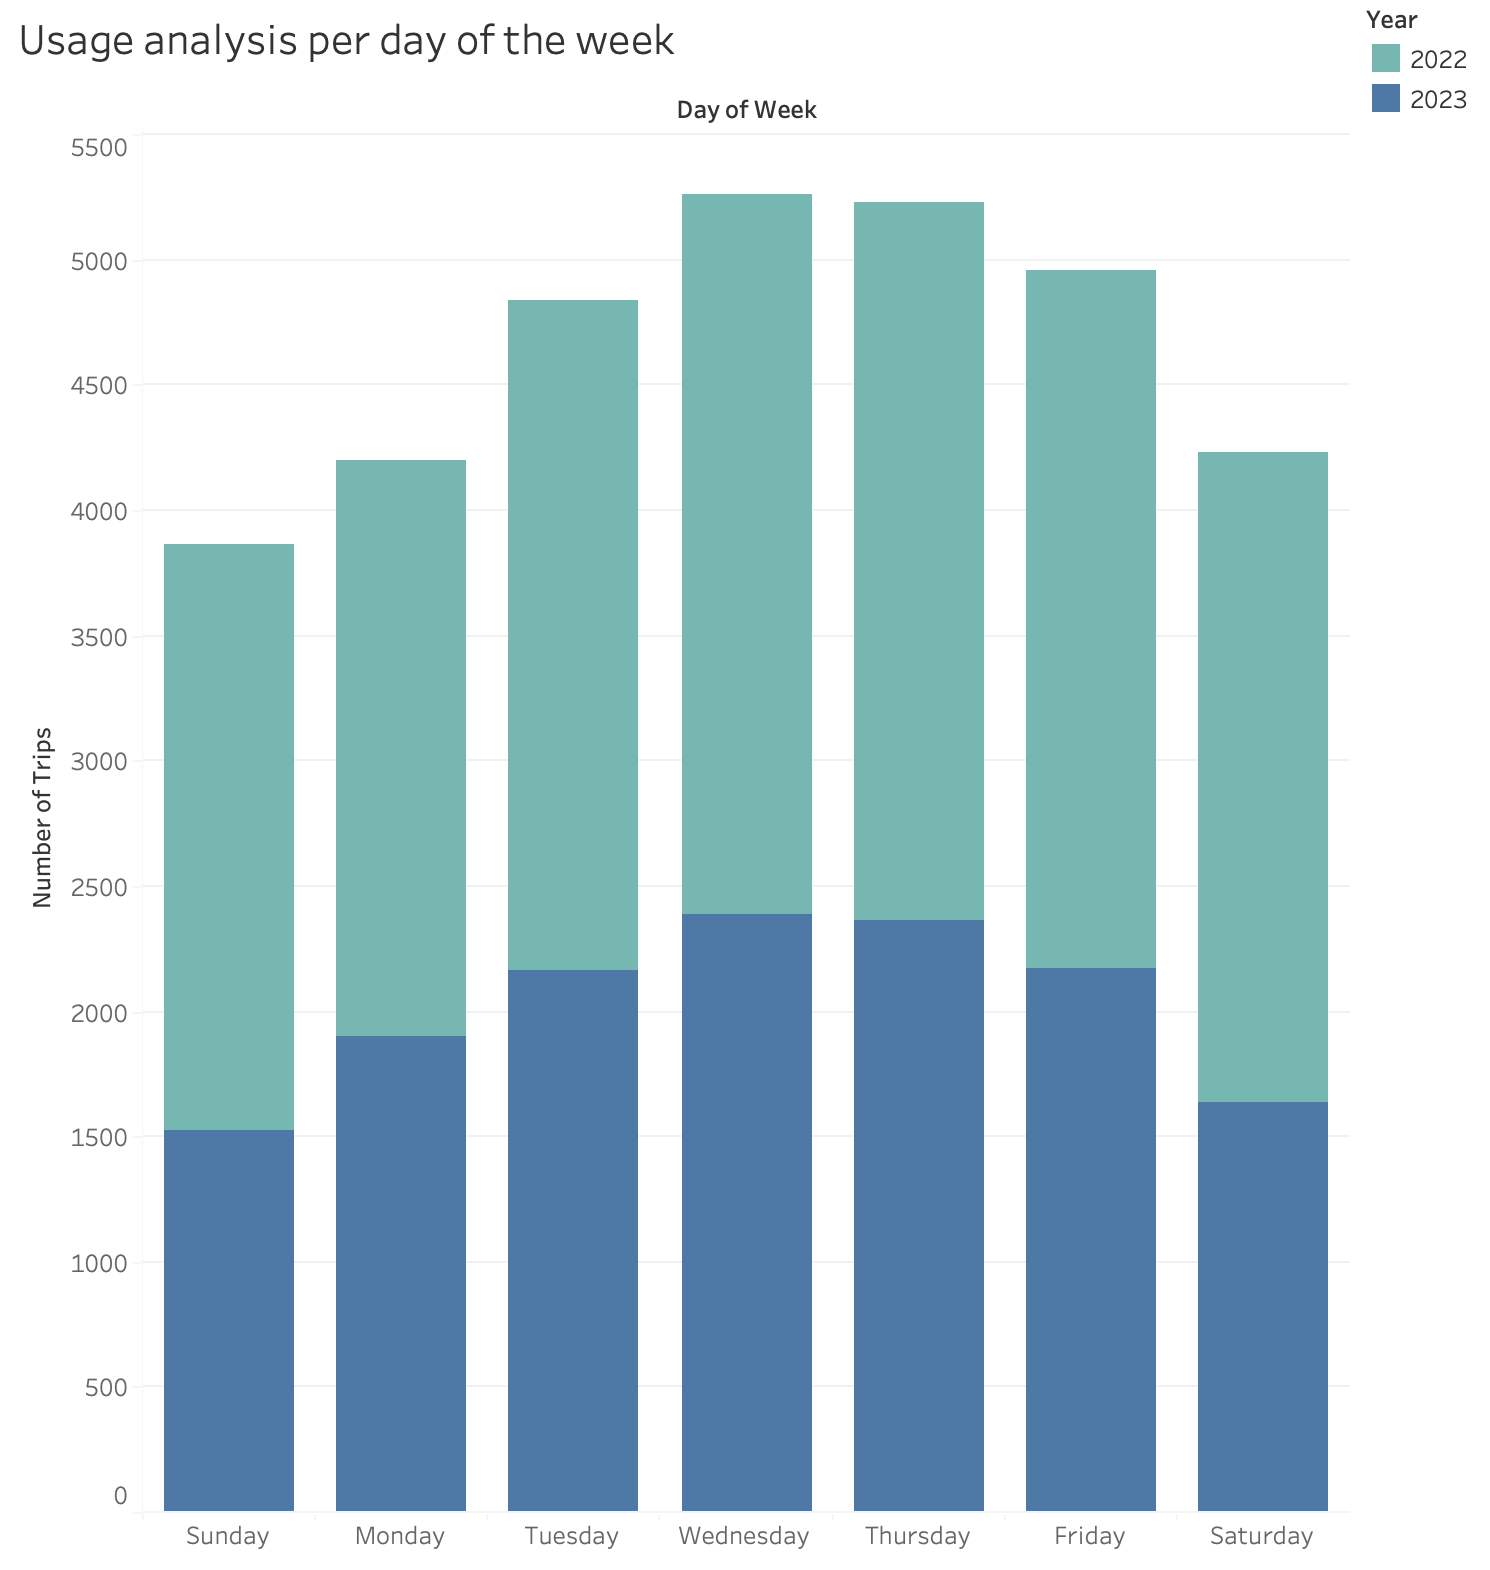

Key Findings:

Overall, weekend trips saw a decline in 2023, with Sunday trips dropping by 10.93% (510,086 to 454,340) and Saturday trips by 18.06% (576,519 to 472,418). In contrast, weekday trips gained a higher share, with notable increases on Tuesday (13.89% to 15.03%), Wednesday (14.58% to 15.67%), and Thursday (14.86% to 15.83%).
Saturday, previously the busiest day in 2022 (15.34% of trips), lost its dominance in 2023, with Thursday taking the lead at 15.83%. Meanwhile, the weekend's share of total trips decreased, with Saturday dropping to 12.85% and Sunday to 12.36%.

##5.7 Average Trip Duration by Dock Availability

In [ ]:
%%bigquery
WITH DockTripStats AS (
    SELECT
        start_station_name AS station_name,
        start_station_total_docks AS total_docks,
        AVG(trip_duration) AS avg_trip_duration,
        COUNT(*) AS total_trips
    FROM
        `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
    GROUP BY
        start_station_name, start_station_total_docks
)

SELECT
    CASE
        WHEN total_docks < 15 THEN 'Low Capacity (<10)'
        WHEN total_docks BETWEEN 15 AND 25 THEN 'Medium Capacity (15-25)'
        ELSE 'High Capacity (>25)'
    END AS dock_category,
    COUNT(DISTINCT total_docks) AS number_of_docks_per_category,
    AVG(avg_trip_duration) AS avg_duration_per_category,
    SUM(total_trips) AS total_trips_per_category
FROM
    DockTripStats
GROUP BY
    dock_category
ORDER BY
    dock_category;

Query is running:   0%|          |

Downloading:   0%|          |

,dock_category,number_of_docks_per_category,avg_duration_per_category,total_trips_per_category
0,High Capacity (>25),9,1709.392908,923633
1,Low Capacity (<10),6,4704.807504,207300
2,Medium Capacity (15-25),9,3071.559406,6226545


Key Findings:

Stations with high capacity (>25 docks) accounted for the highest total trips (923,633) but had the shortest average trip duration (1,709.39 seconds). Medium-capacity stations (15–25 docks) contributed significantly to overall trips (622,645) and had a moderate average trip duration (3,071.56 seconds).
Low-capacity stations (<10 docks), while hosting the fewest trips (207,300), recorded the longest average trip duration (4,704.81 seconds). This pattern suggests that stations with fewer docks may cater to different trip needs, such as longer-distance rides, compared to high-capacity stations that may serve shorter, frequent trips.

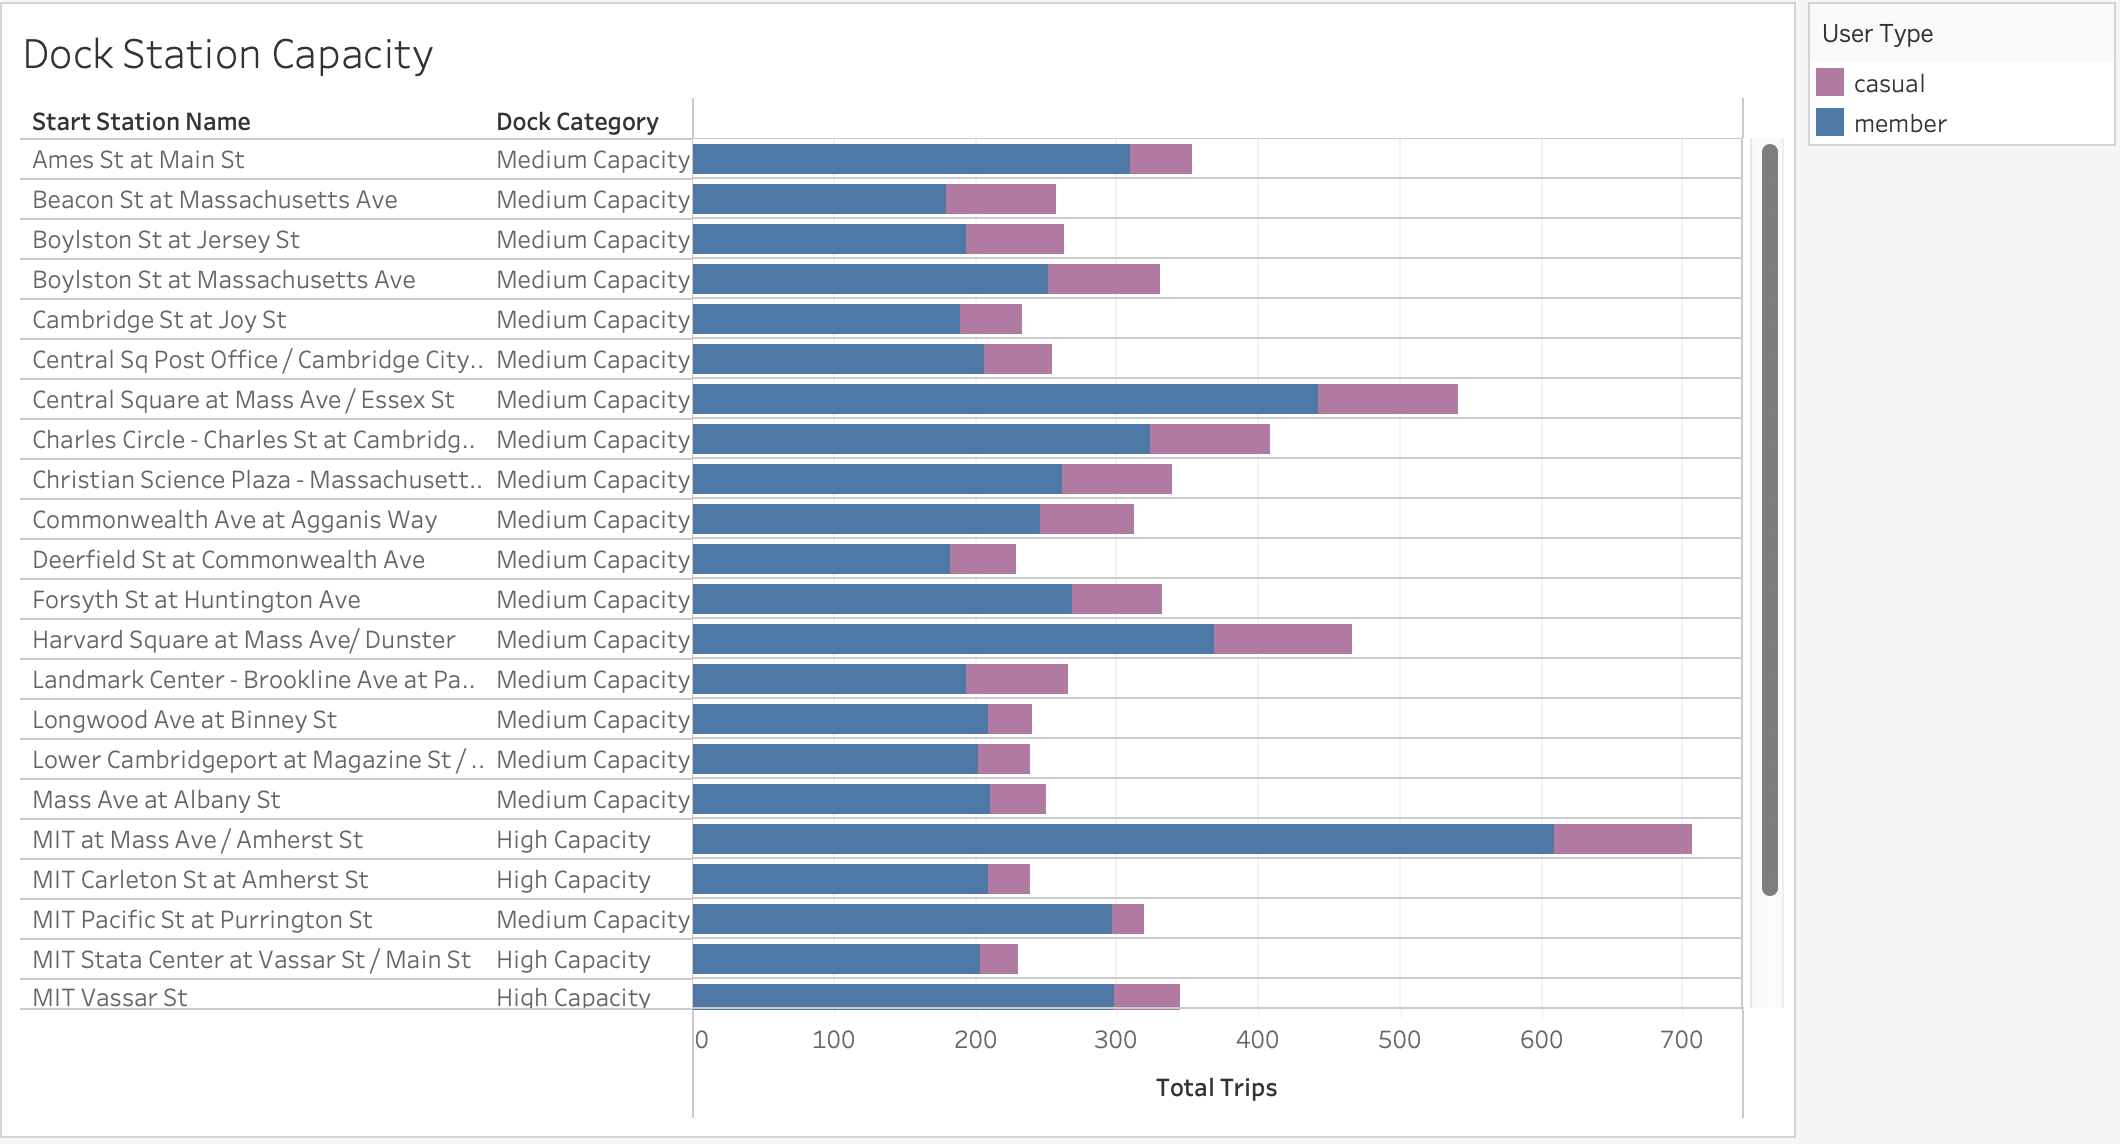

##5.8 Weekday vs Weekend analysis

What is the average Trip Duration per route for weekday and weekend?

In [ ]:
%%bigquery
WITH station_pairs AS (
    SELECT
        start_station_name,
        end_station_name,
        AVG(CASE
            WHEN EXTRACT(DAYOFWEEK FROM start_time) IN (1, 7) THEN trip_duration
        END)/60 as weekend_avg_duration,
        AVG(CASE
            WHEN EXTRACT(DAYOFWEEK FROM start_time) IN (2,3,4,5,6) THEN trip_duration
        END)/60 as weekday_avg_duration,
        COUNT(*) as total_trips
    FROM ba775-project-a05.bluebike_trips.final_version_bluebike_trips
    GROUP BY
        start_station_name,
        end_station_name
    HAVING total_trips >= 1
),
abc AS (
SELECT
    PERCENTILE_CONT(trip_duration/60, 0.5) OVER() as median_duration
FROM ba775-project-a05.bluebike_trips.final_version_bluebike_trips LIMIT 1)
SELECT
    start_station_name,
    end_station_name,
    ROUND(weekend_avg_duration, 1) as weekend_avg_duration_mins,
    ROUND(weekday_avg_duration, 1) as weekday_avg_duration_mins,
    ABS(ROUND((ROUND(weekend_avg_duration, 1) - ROUND(weekday_avg_duration, 1)),1)) AS difference,
    (SELECT median_duration FROM abc) AS median_duration,
    total_trips
FROM station_pairs
WHERE weekend_avg_duration IS NOT NULL
    AND weekday_avg_duration IS NOT NULL
ORDER BY total_trips DESC, difference DESC

Query is running:   0%|          |

Downloading:   0%|          |

,start_station_name,end_station_name,weekend_avg_duration_mins,weekday_avg_duration_mins,difference,median_duration,total_trips
0,MIT at Mass Ave / Amherst St,Beacon St at Massachusetts Ave,6.3,5.5,0.8,12.05,9585
1,MIT at Mass Ave / Amherst St,Central Square at Mass Ave / Essex St,8.8,7.8,1.0,12.05,9118
2,Beacon St at Massachusetts Ave,MIT at Mass Ave / Amherst St,6.6,6.2,0.4,12.05,9053
3,Harvard Square at Mass Ave/ Dunster,Harvard University Radcliffe Quadrangle at She...,8.4,7.3,1.1,12.05,8944
4,MIT at Mass Ave / Amherst St,MIT Vassar St,8.4,7.0,1.4,12.05,8066
...,...,...,...,...,...,...,...
79257,Tremont St at W. Dedham St,NCAAA - Walnut Ave at Crawford St,21.1,21.1,0.0,12.05,2
79258,Orient Heights T Stop - Bennington St at Sarat...,Main Street/Albany Street/Technology Square,36.5,36.5,0.0,12.05,2
79259,Harvard St and Stedman St,Ink Block - Harrison Ave at Herald St,22.3,22.3,0.0,12.05,2
79260,Bartlett St at John Elliot Sq,Grove St at Community Path,40.5,40.5,0.0,12.05,2


Key findings:

For the busiest routes, weekday trip duration averages are typically lower than weekend durations by around 1 minute. This suggests that people are probably in a hurry during the weekdays and so tend to go faster, while they are more relaxed during weekends so they tend to go slower. It is a bit surprising because one may expect the popular routes to have more traffic and so go slower on weekdays, but the data doesn't support this hypothesis.

We don't see this trend for the less popular or longer routes. Perhaps the people who use these routes are in professions which are indifferent to weekend holidays, or maybe the dataset is not big enough in this domain for it to capture greater insights. It is also possible that the distance is so large that minor differences in trip durations don't have any impact.

##5.9 Seasonal and Temporal patterns of bike users

In [ ]:
%%bigquery

WITH temporal_metrics AS (
  SELECT
    user_type,
    EXTRACT(HOUR FROM start_time) as hour_of_day,
    EXTRACT(DAYOFWEEK FROM start_time) as day_of_week,
    CASE
      WHEN EXTRACT(HOUR FROM start_time) BETWEEN 7 AND 9 THEN 'Morning Rush'
      WHEN EXTRACT(HOUR FROM start_time) BETWEEN 16 AND 18 THEN 'Evening Rush'
      ELSE 'Off Peak'
    END as peak_category,
    trip_duration/60 as duration_minutes,
    CASE
      WHEN EXTRACT(MONTH FROM start_time) IN (6,7,8) THEN 'Summer'
      WHEN EXTRACT(MONTH FROM start_time) IN (12,1,2) THEN 'Winter'
      ELSE 'Fall'
    END as season
  FROM ba775-project-a05.bluebike_trips.final_version_bluebike_trips
),
commute_patterns AS (
  SELECT
    user_type,
    peak_category,
    season,
    COUNT(*) as ride_count,
    ROUND(AVG(duration_minutes), 2) as avg_duration,
    COUNT(DISTINCT day_of_week) as active_days
  FROM temporal_metrics
  GROUP BY 1,2,3
)
SELECT
  user_type,
  peak_category,
  season,
  ride_count,
  avg_duration,
  ROUND(ride_count * 100.0 / SUM(ride_count) OVER (PARTITION BY user_type), 2) as percentage_of_user_rides,
  ROUND(ride_count * 100.0 / SUM(ride_count) OVER (PARTITION BY peak_category), 2) as percentage_of_timeperiod
FROM commute_patterns
WHERE ride_count > 50
ORDER BY user_type, ride_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,user_type,peak_category,season,ride_count,avg_duration,percentage_of_user_rides,percentage_of_timeperiod
0,casual,Off Peak,Fall,673798,52.02,36.03,14.17
1,casual,Off Peak,Summer,530491,65.25,28.37,11.16
2,casual,Evening Rush,Fall,255668,50.12,13.67,14.46
3,casual,Evening Rush,Summer,172239,62.67,9.21,9.74
4,casual,Off Peak,Winter,85686,52.12,4.58,1.80
5,casual,Morning Rush,Fall,76359,34.55,4.08,9.14
6,casual,Morning Rush,Summer,36326,44.30,1.94,4.35
7,casual,Evening Rush,Winter,28137,49.05,1.50,1.59
8,casual,Morning Rush,Winter,11196,36.38,0.60,1.34
9,member,Off Peak,Fall,1851409,15.55,33.74,38.95


Key Findings:

Casual riders showed peak usage during off-peak hours in fall (673,798 rides) and summer (530,491 rides), with longer average durations of 52.02 and 65.25 minutes, respectively. Evening rush hours saw fewer rides, with counts ranging from 255,668 (fall) to 172,239 (summer) and durations of 50.12–62.67 minutes. Winter had lower off-peak rides (85,686) but comparable durations of 52.12 minutes.
Members dominated off-peak fall rides (1,851,409) with much shorter average durations of 15.55 minutes. Casual users favored summer off-peak times, while members consistently preferred shorter, frequent rides during off-peak hours throughout the year.

### Updates-Nan Li

By analyzing the monthly ride counts and dock turnover rates for each station during the winter period, we discovered that some stations labeled as “Winter Storage” or “Offline for Winter” were still in use, albeit at low levels. As we identify seasonal patterns of rider behavior based on our analysis, to gain a more accurate understanding of station usage, we plan to calculate the dock turnover rate for each station across all seasons during the 2022–2023 period.

Turnover rate per season: trips per season/total docks per station

Note: A winter period includes December, Janurary, and February.

In [ ]:
%%bigquery

-- filter the stations labeled for winter storage and calculate their monthly usage during winter periods
WITH offline_for_winter AS (
  SELECT * FROM ba775-project-a05.bluebike_trips.final_version_bluebike_trips
  WHERE start_seasonal_status ='Offline for Winter' or start_seasonal_status = 'Winter Storage'
)

SELECT start_station_municipality,
        start_station_ID,
        start_station_name,
        FORMAT_TIMESTAMP('%Y-%m', start_time) AS year_month,
        COUNT(*) AS trip_count,
        COUNT(*)/start_station_total_docks AS turnover_per_month
FROM offline_for_winter
WHERE FORMAT_TIMESTAMP('%Y-%m', start_time) IN ('2022-01','2022-02','2022-12','2023-01','2023-02','2023-12')
GROUP BY start_station_municipality, start_station_ID,start_station_name,year_month,start_station_total_docks
ORDER BY year_month

Query is running:   0%|          |

Downloading:   0%|          |

,start_station_municipality,start_station_ID,start_station_name,year_month,trip_count,turnover_per_month
0,Newton,N32002,Nonantum Library,2022-01,6,0.400000
1,Boston,A32055,Airport T Stop - Bremen St at Brooks St,2022-01,25,1.666667
2,Newton,N32008,Langley Lot,2022-01,4,0.363636
3,Newton,N32011,California at Chapel,2022-01,9,0.750000
4,Newton,N32015,Auburndale,2022-01,3,0.200000
...,...,...,...,...,...,...
68,Newton,N32001,Washington St at Crafts St,2023-12,6,0.545455
69,Newton,N32002,Nonantum Library,2023-12,6,0.400000
70,Newton,N32015,Auburndale,2023-12,1,0.066667
71,Everett,V32009,Pope John High School,2023-12,3,0.200000


In [ ]:
%%bigquery

CREATE TABLE ba775-project-a05.bluebike_trips.low_seasonal_turnover_start AS

WITH trip_data AS (
  SELECT
    start_station_ID,
    EXTRACT(YEAR FROM start_time) AS year
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  GROUP BY start_station_id, year
),

station_year_counts AS (
  SELECT
    start_station_id,
    COUNT(DISTINCT year) AS year_count
  FROM trip_data
  GROUP BY start_station_id
),

-- filtering the stations with only one year
stations_excluded AS (
  SELECT
    td.start_station_id,
    td.year
  FROM trip_data td
  JOIN station_year_counts y
    ON td.start_station_id = y.start_station_id
  WHERE y.year_count = 1
  ORDER BY year
)

SELECT
start_station_municipality,
start_station_ID,
start_station_name,
CASE
  WHEN EXTRACT(MONTH FROM start_time) IN (3,4,5) THEN 'spring'
  WHEN EXTRACT(MONTH FROM start_time) IN (6,7,8) THEN 'summer'
  WHEN EXTRACT(MONTH FROM start_time) IN (9,10,11) THEN 'fall'
  ELSE 'winter'
END AS season,
COUNT(*) AS trip_count,
ROUND(COUNT(*)/start_station_total_docks,2) AS seasonal_turnover_rate
FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
WHERE start_station_ID NOT IN (
  SELECT start_station_id FROM stations_excluded  --exclude the stations added or removed in 2023
)
GROUP BY
  start_station_municipality,
  start_station_ID,
  start_station_name,
  season,
  start_station_total_docks
HAVING
  ROUND(COUNT(*) / start_station_total_docks, 2) < 10   --filter the start stations with seasonal turnover rate less than 10
ORDER BY seasonal_turnover_rate;


Query is running:   0%|          |

""


In [ ]:
%%bigquery

CREATE TABLE ba775-project-a05.bluebike_trips.low_seasonal_turnover_end AS

WITH trip_data AS (
  SELECT
    end_station_ID,
    EXTRACT(YEAR FROM stop_time) AS year
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  GROUP BY end_station_id, year
),

station_year_counts AS (
  SELECT
    end_station_id,
    COUNT(DISTINCT year) AS year_count
  FROM trip_data
  GROUP BY end_station_id
),

-- filtering the stations with only one year
stations_excluded AS (
  SELECT
    td.end_station_id,
    td.year
  FROM trip_data td
  JOIN station_year_counts y
    ON td.end_station_id = y.end_station_id
  WHERE y.year_count = 1
  ORDER BY year
)

SELECT
end_station_municipality,
end_station_ID,
end_station_name,
CASE
  WHEN EXTRACT(MONTH FROM stop_time) IN (3,4,5) THEN 'spring'
  WHEN EXTRACT(MONTH FROM stop_time) IN (6,7,8) THEN 'summer'
  WHEN EXTRACT(MONTH FROM stop_time) IN (9,10,11) THEN 'fall'
  ELSE 'winter'
END AS season,
COUNT(*) AS trip_count,
ROUND(COUNT(*)/end_station_total_docks,2) AS seasonal_turnover_rate
FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
WHERE end_station_ID NOT IN (
  SELECT end_station_id FROM stations_excluded  --exclude the stations added or removed in 2023
)
GROUP BY
  end_station_municipality,
  end_station_ID,
  end_station_name,
  season,
  end_station_total_docks
HAVING
  ROUND(COUNT(*) / end_station_total_docks, 2) < 10   --filter the start stations with seasonal turnover rate less than 10
ORDER BY seasonal_turnover_rate;


Query is running:   0%|          |

""


In [ ]:
%%bigquery
--identify the stations with low seasonal turnover as start and end stops
WITH low_turnover_start_end As (
  SELECT
    ls.start_station_municipality AS municipality,
    ls.start_station_ID AS station_ID,
    ls.start_station_name AS station_name,
    ls.season AS start_season,
    ls.seasonal_turnover_rate AS start_turnover,
    le.season AS end_season,
    le.seasonal_turnover_rate AS end_turnover
  FROM `ba775-project-a05.bluebike_trips.low_seasonal_turnover_start` ls
  INNER JOIN `ba775-project-a05.bluebike_trips.low_seasonal_turnover_end` le
  ON ls.start_station_ID = le.end_station_ID
)

SELECT *
FROM low_turnover_start_end
WHERE start_season = end_season

Query is running:   0%|          |

Downloading:   0%|          |

,municipality,station_ID,station_name,start_season,start_turnover,end_season,end_turnover
0,Salem,T32001,Salem Ferry Landing,winter,0.09,winter,0.09
1,Boston,C32094,2 Hummingbird Lane at Olmsted Green,winter,0.47,winter,0.35
2,Boston,E32013,Hyde Park Library,winter,0.53,winter,1.47
3,Newton,N32013,Newton Library,winter,0.54,winter,1.00
4,Boston,C32048,Archdale Rd at Washington St,winter,0.67,winter,0.73
...,...,...,...,...,...,...,...
135,Boston,C32081,Washington St at Denton Terr,spring,9.47,spring,5.68
136,Boston,C32078,Northbourne Rd at Hyde Park Ave,spring,9.53,spring,9.79
137,Boston,C32050,Mattapan Library,fall,9.53,fall,9.87
138,Boston,E32011,The Dimock Center,winter,9.56,winter,6.44


Key Insights:

We identified 140 stations where the seasonal turnover rate was below 10 trips per dock in at least one season, both as starting and ending points.
This indicates consistently low usage, suggesting these stations may be underutilized and could lead to inefficient resource allocation if maintained year-round at full capacity.

Recommendation:
Consider implementing seasonal storage or partial deactivation strategies for these low-demand stations. This could help optimize operational costs and rebalance resources toward higher-demand locations during peak seasons.



#**6. Tableau Dashboard**

[Tableau Public dashboard](https://public.tableau.com/app/profile/adesina.adeniran/viz/ba775projectfinalcopy/BlueBikes?publish=yes)

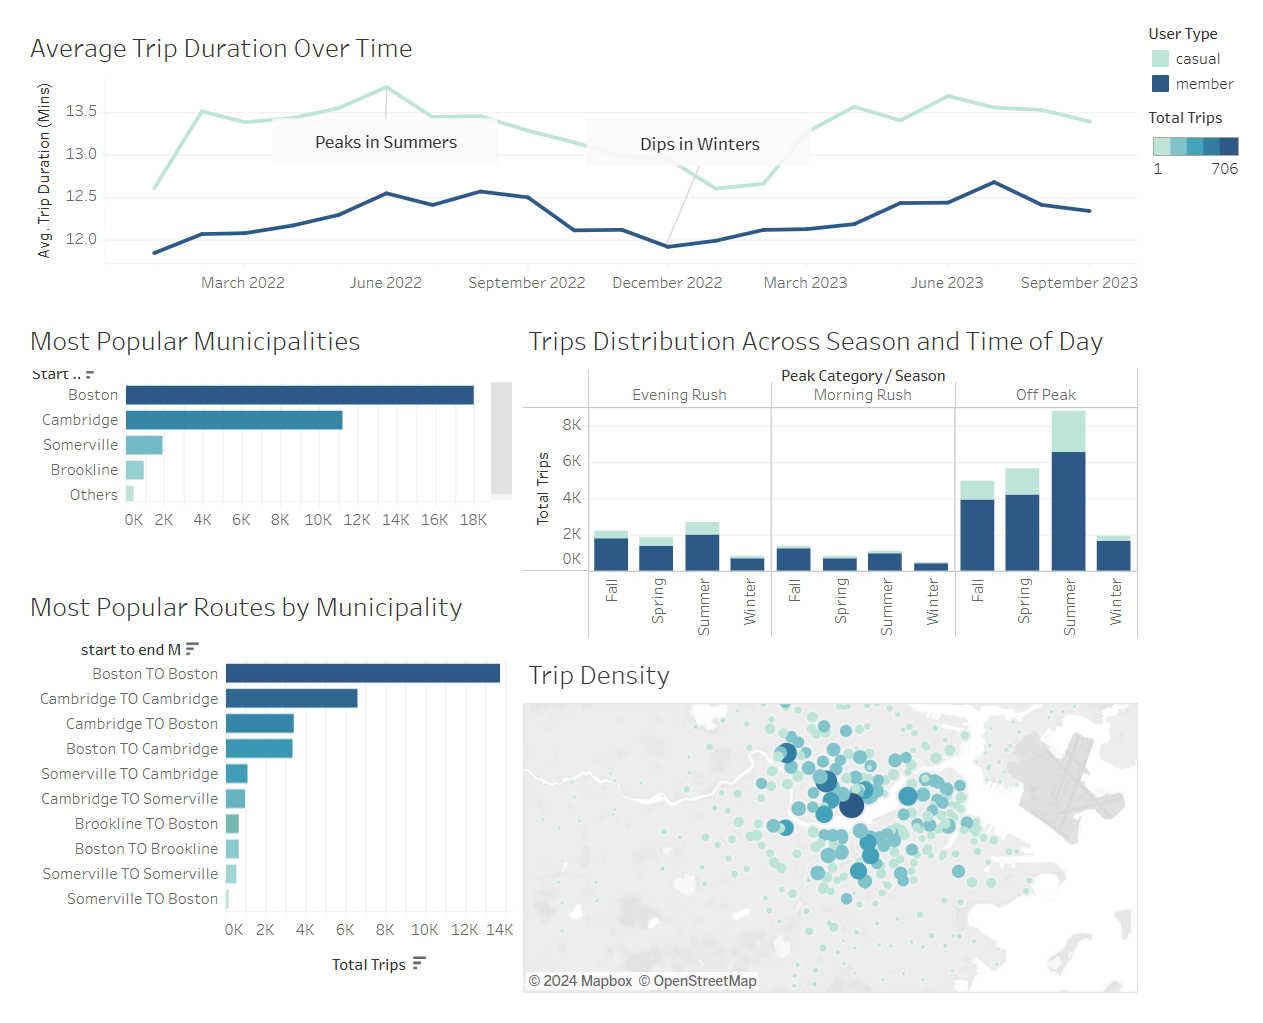

### Updates-Nan Li

[Tableau Dashboard](https://public.tableau.com/shared/M7TN85KCP?:display_count=n&:origin=viz_share_link)

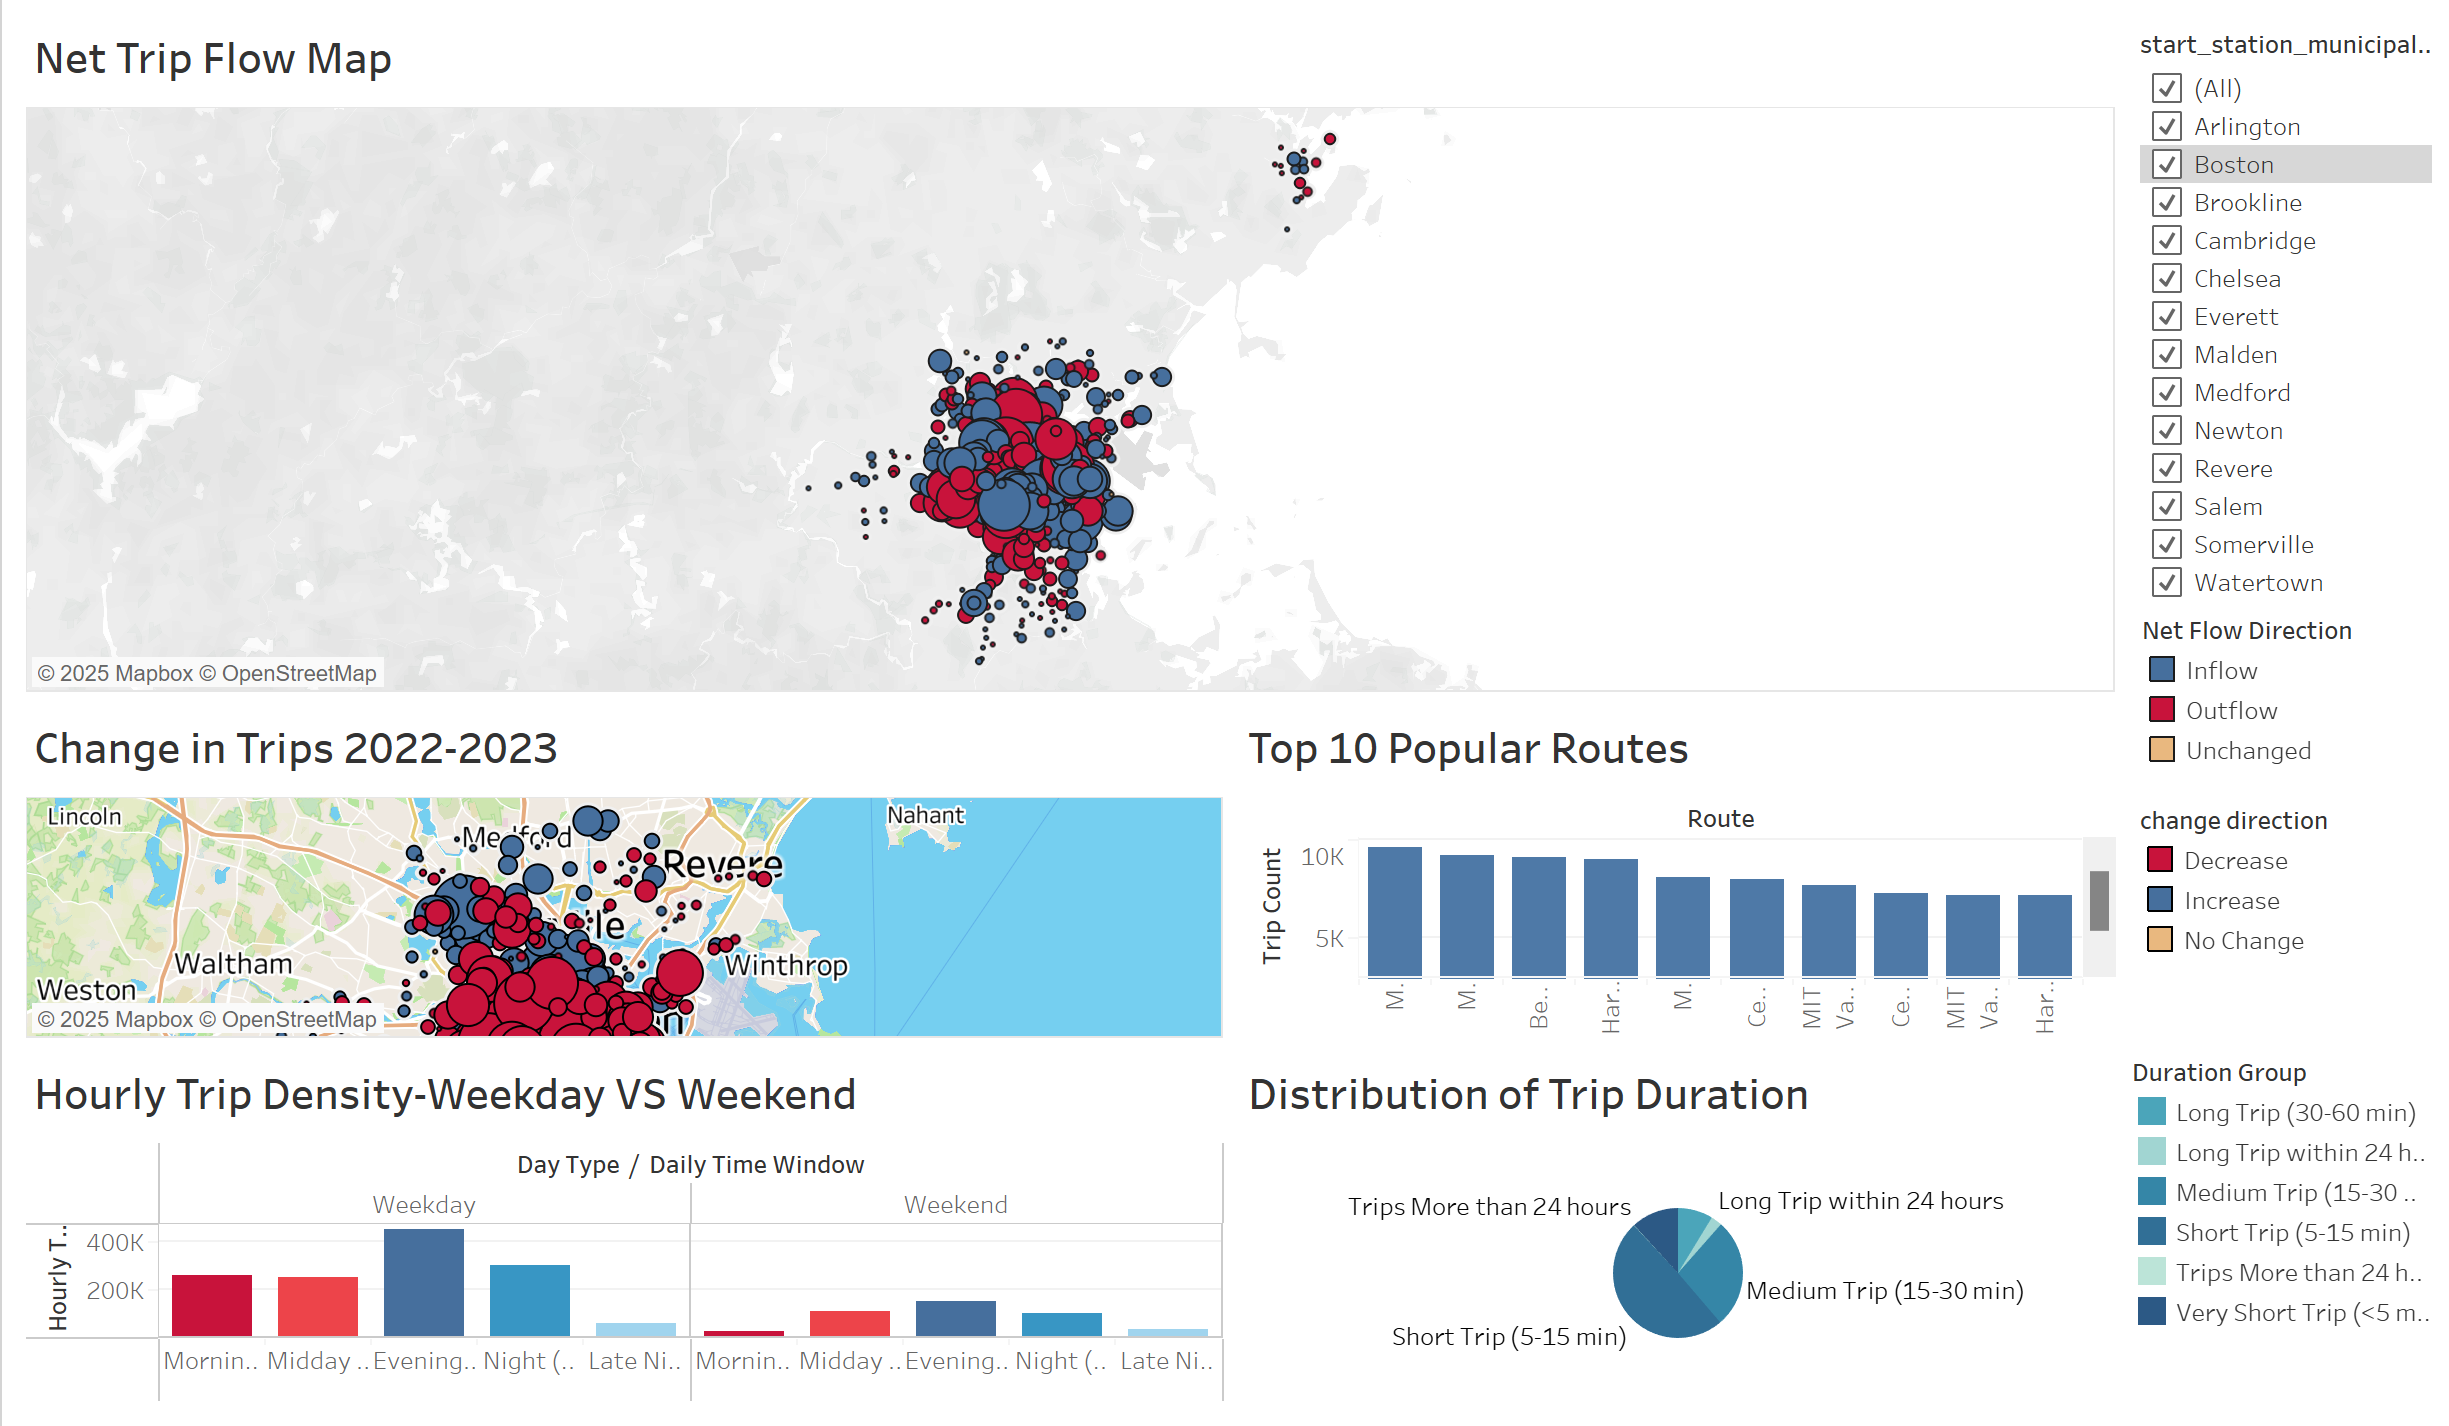

#<span style="font-family: Arial; font-size: 20px;color:#0047ab">**8. Key Insights**

- The most popular route for Bluebike riders is between MIT and Beacon St. at Mass Ave.

- Popular routes by municipalities include:
  - Cambridge-Boston
  - Somerville-Cambridge
  - Brookline-Boston
  - Somerville-Boston
  - Brookline-Cambridge
  
- Many routes involve MIT locations, suggesting it’s a major hub for Bluebikes.
- Harvard Square and Harvard University locations also feature prominently in several routes.
- Routes connect various academic institutions, squares, and streets in the area.

- People prefer longer bicycle rides during the summer, with August 2023 seeing an average duration spike of about 15 minutes more than in 2022.
- Overall trip usage for:
  - Casual users peaks at the end of summer and beginning of fall.
  - Members peaks during the fall season, rather than summer, which is surprising.
- By comparing 2023 data with 2022:
  - Both casual and member trips declined in June and July 2023.
  - Winter months like January, February, and December saw a sharp increase in trips compared to 2022.
- Municipalities with the most Bluebike stations:
  - Boston (264 stations)
  - Cambridge (89 stations)
  - Somerville (36 stations)
  - Salem (18 stations)
  - Newton (15 stations)
  - These areas have high numbers of offices and colleges, making them popular destinations.
- Municipalities with the fewest Bluebike stations:
  - Malden, Revere, Chelsea, Arlington, and Watertown.
  - These areas have fewer Bluebike users and are less densely populated compared to Boston, Brookline, and Cambridge.
- Most active municipalities by ride origin:
  - Boston, Cambridge, Somerville, Brookline, and Watertown.
  - Despite high demand, Brookline and Watertown have only 14 and 6 stations respectively, indicating a potential need for more stations in these areas.
- MIT at Mass Ave / Amherst St. is the most popular start/end station throughout the year, likely due to its strategic location near the Harvard bridge.
- The top 3 most popular start/end stations are all located in Cambridge.


#<span style="font-family: Arial; font-size: 20px;color:#0047ab">**7. Conclusion**

This comprehensive analysis of Greater Boston BlueBikes usage during 2022-2023 highlights critical insights into rider behavior, infrastructure limitations, and operational inefficiencies. These findings provide a roadmap to enhance service accessibility, efficiency, and user satisfaction while identifying opportunities for strategic expansion and data-driven improvements.

**Insights**
1.	**Key Demand Trends:** Member usage peaks in fall, casual riders dominate late summer, and weekday trips gained prominence in 2023.
2.	**Popular Routes and Hubs:** Routes between Cambridge, Boston, and Brookline are the busiest, with the MIT station at Mass Ave / Amherst St as the top hub.
3.	**Infrastructure Gaps:** High-demand areas like Brookline and Watertown lack sufficient stations. Low-capacity stations support longer trips, while high-capacity stations enable shorter, frequent rides.
4.	**Shifting Demand:** Turnover rates dropped across top stations, with localized demand surges (e.g., Boylston St's rise in popularity) suggesting targeted growth opportunities.

**Recommendations**
*	**Expand Infrastructure:** Add stations in underserved high-demand areas like Brookline, Watertown, and Revere to close accessibility gaps.
*	**Seasonal Adjustments:** Deploy more bikes in winter and optimize summer station placements to support increased recreational usage.
*	**Operational Efficiency:** Focus on weekday service reliability and optimize resources for peak usage days like Thursdays.
*	**Data-Driven Strategies:** Use MBTA outage and ridership data to predict demand surges and optimize bike allocation dynamically.

**Future Steps**
*	**Advanced Data Integration:** Incorporate predictive analytics using MBTA data and real-time ridership patterns to improve operational planning.
*	**Behavioral Analysis:** Dive deeper into rider preferences to design tailored promotions and service adjustments for both casual and member users.
*	**Segment-Specific Insights:** Study the behavior of niche rider segments (e.g., students, commuters, tourists) to design segment-specific campaigns and service offerings.
*	**Competitve Benchmarking:** Compare BlueBikes’ performance to other U.S. bike-share systems to identify best practices and competitive advantages.
*	**Technology Implementation:** Deploy smart sensors at stations to monitor availability and identify bottlenecks in real time.

This analysis establishes a strong foundation for improving BlueBikes' accessibility and efficiency while addressing the diverse needs of its users. By leveraging the insights and recommendations provided, the system can drive sustained growth, enhance user satisfaction, and solidify its role as a critical component of Greater Boston's transportation network.


#<span style="font-family: Arial; font-size: 20px;color:#0047ab"> **8. Challenges**

1. NaN values for Sept 23:

We initially joined and then tried to clean the data, leading to an absurd situation where there were values for every row except for September 2023. This was resolved after changing our approach to cleaning the data first and joining it later.


2. IQR Filtering for better analysis:

When we analysed the trip duration in the dataset, we found that the standard deviation (25521) was significantly larger than the median (723), and the mean (1549). That indicated a lot of noise in the data. This happened because of two reasons: some users started the trip and immediately cancelled it, while others didn’t cancel it even after 7 hours. and We decided to filter the data using Interquartile Range for the trip duration. This ensured that the noise in the dataset was reduced.
SQL query:
%%bigquery
SELECT ROUND(AVG(trip_duration),1)as avg_duration, ROUND(STDDEV(trip_duration),1) as std_dev, (WITH ranked_trips AS (
  SELECT
    trip_duration,
    ROW_NUMBER() OVER (ORDER BY trip_duration) as row_num,
    COUNT(*) OVER () as total_count
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
)
SELECT AVG(trip_duration) as median_duration
FROM ranked_trips
WHERE row_num IN ((total_count + 1)/2, (total_count + 2)/2)) as median_duration
FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`

Finally, We used a random sample from this dataset for our Tableau Visualisations.


#<span style="font-family: Arial; font-size: 20px;color:#0047ab"> **9. References**

1.  [Bluebike station winter service explained](https://www.somervillema.gov/bikeshare)
1.	[Mohammad Soltanieh-ha, "BA775 -Business Analytics Toolbox", Colab Notebooks, Fall 2024](https://github.com/soltaniehha/Business-Analytics-Toolbox)
2.	[Datacamp Modules](https://app.datacamp.com/learn/assignments)
3.	[Previous Year Projects](https://github.com/soltaniehha/Business-Analytics-Toolbox/tree/master/docs/team-projects)
4.	[Tableau Chart Ideas](https://www.simplilearn.com/tutorials/tableau-tutorial/tableau-charts)
5. [Bike and Scooter Rental Market](https://www.marketsandmarkets.com/Market-Reports/bike-scooter-rental-market-122654882.html)


#<span style="font-family: Arial; font-size: 20px;color:#0047ab">**10. Generative AI statement**

In completing this project, we have utilized Generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were used:

-	Code Review and Debugging: We used GPT-4o to make our code more efficient, resolve syntax errors and add few components to certain visualisation codes.

-	Proofreading and Grammar Checks: We used Grammarly to refine our writing, improve readability, and ensure grammatical accuracy.

-	Colormapping: We used ChatGPT to explore available color palettes and how they can be integrated.

-	Legend and Title: We used ChatGPT to understand how to bring the legend and title to the center, as they were overlapping.

-	We used ChatGPT with the syntax for creating calculated fields in Tableau.


Our team has reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.
